# Import Library

In [1]:
import pandas as pd
from pandas import DataFrame as df

import numpy as np
import re
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

from matplotlib import rc, font_manager
rc('font', family='NanumGothic')

#from fbprophet.plot import plot_plotly
import plotly.offline as py
import pandas_profiling

In [2]:
card = pd.read_csv('Rawdata/카드매출데이터/CARD_SPENDING_190809.txt', sep = "\t")

# 데이터 set


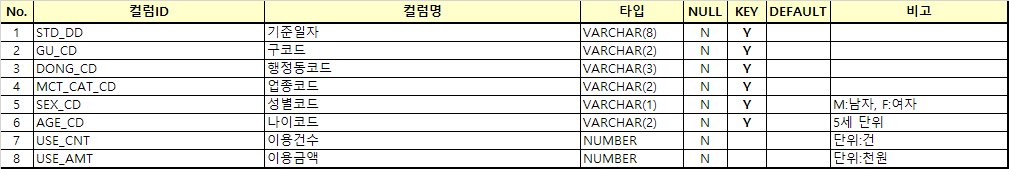  

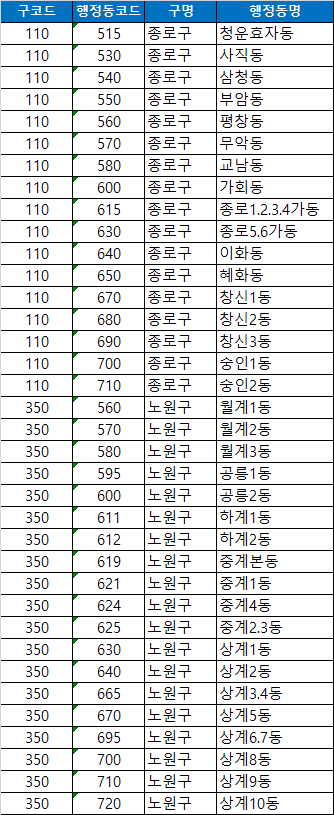

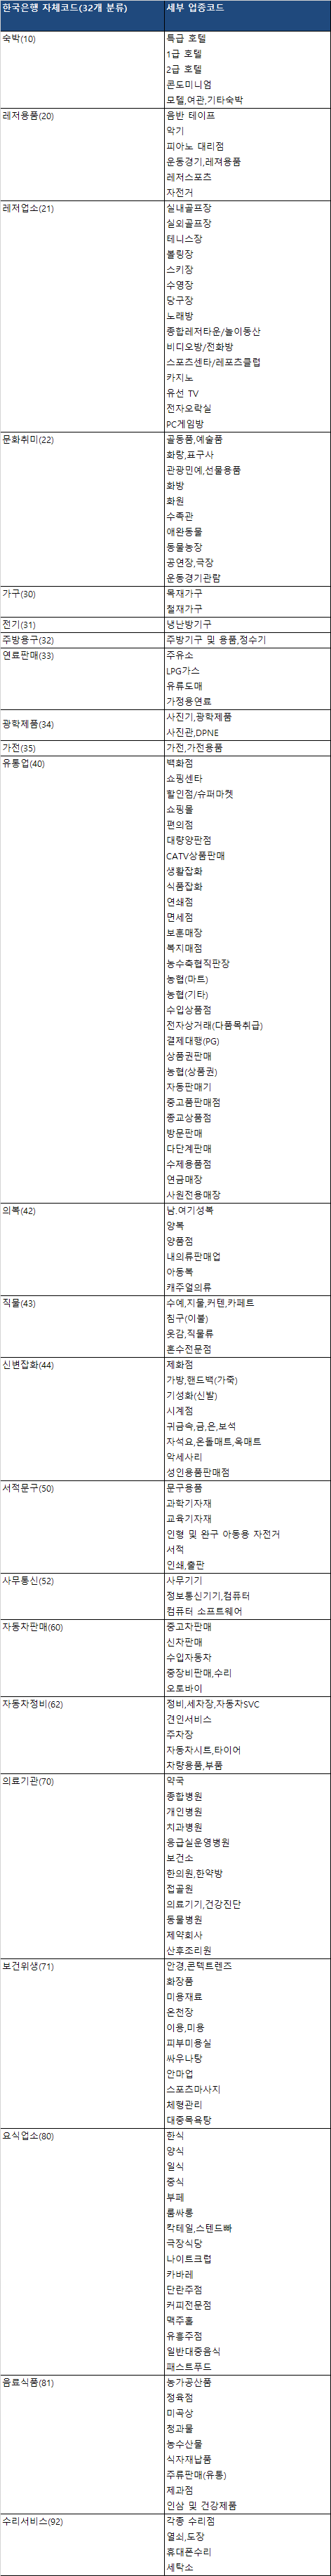

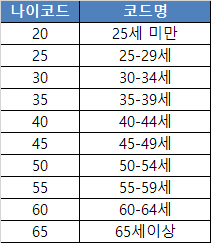

# 행정동 파일 불러오기

In [3]:
GU = '''
110	515	종로구	청운효자동
110	530	종로구	사직동
110	540	종로구	삼청동
110	550	종로구	부암동
110	560	종로구	평창동
110	570	종로구	무악동
110	580	종로구	교남동
110	600	종로구	가회동
110	615	종로구	종로1.2.3.4가동
110	630	종로구	종로5.6가동
110	640	종로구	이화동
110	650	종로구	혜화동
110	670	종로구	창신1동
110	680	종로구	창신2동
110	690	종로구	창신3동
110	700	종로구	숭인1동
110	710	종로구	숭인2동
350	560	노원구	월계1동
350	570	노원구	월계2동
350	580	노원구	월계3동
350	595	노원구	공릉1동
350	600	노원구	공릉2동
350	611	노원구	하계1동
350	612	노원구	하계2동
350	619	노원구	중계본동
350	621	노원구	중계1동
350	624	노원구	중계4동
350	625	노원구	중계2.3동
350	630	노원구	상계1동
350	640	노원구	상계2동
350	665	노원구	상계3.4동
350	670	노원구	상계5동
350	695	노원구	상계6.7동
350	700	노원구	상계8동
350	710	노원구	상계9동
350	720	노원구	상계10동
'''

In [4]:
df_GU=pd.DataFrame(re.findall(r"[\S]+",GU))

In [5]:
df_GU=pd.DataFrame(df_GU.values.reshape(36,4))

In [6]:
df_GU.rename(columns={0:"GU_CD",1:"DONG_CD",2:"GU",3:"DONG"}, inplace=True)

In [7]:
df_GU['GU_CD']=df_GU['GU_CD'].astype('category')
df_GU['DONG_CD']=df_GU['DONG_CD'].astype('category')
df_GU['GU']=df_GU['GU'].astype('category')
df_GU['DONG']=df_GU['DONG'].astype('category')

In [8]:
df_GU.head()

GU_CD DONG_CD   GU   DONG
0   110     515  종로구  청운효자동
1   110     530  종로구    사직동
2   110     540  종로구    삼청동
3   110     550  종로구    부암동
4   110     560  종로구    평창동

# 카드 카테고리명 불러오기

In [9]:
list = pd.DataFrame(['숙박(10)', '레저용품(20)', '레저업소(21)', '문화취미(22)', '가구(30)', '전기(31)', '주방용구(32)', '연료판매(33)', '광학제품(34)', '가전(35)', '유통업(40)', '의복(42)', '직물(43)', '신변잡화(44)', '서적문구(50)', '사무통신(52)', '자동차판매(60)', '자동차정비(62)', '의료기관(70)', '보건위생(71)', '요식업소(80)', '음료식품(81)', '수리서비스(92)'], columns=['MCT_CAT_CD'])

In [10]:
cate=list['MCT_CAT_CD'].str.split("(", n=1, expand=True)

In [11]:
cate.rename({0:'NAME',1:'MCT_CAT_CD'},axis=1,inplace=True)
cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].str.replace(")","")

In [12]:
cate['NAME']=cate['NAME'].astype('category')
cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('category')

In [13]:
cate.head()

NAME MCT_CAT_CD
0    숙박         10
1  레저용품         20
2  레저업소         21
3  문화취미         22
4    가구         30

In [14]:
card.head()

STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0  20180401    110      515          21      F      30        4      180
1  20180401    110      515          21      F      55        4       22
2  20180401    110      515          21      M      20       35      184
3  20180401    110      515          21      M      25       70      425
4  20180401    110      515          21      M      30       18       82

In [15]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152963 entries, 0 to 2152962
Data columns (total 8 columns):
STD_DD        int64
GU_CD         int64
DONG_CD       int64
MCT_CAT_CD    int64
SEX_CD        object
AGE_CD        int64
USE_CNT       int64
USE_AMT       int64
dtypes: int64(7), object(1)
memory usage: 131.4+ MB


In [16]:
card['STD_DD']=pd.to_datetime(card['STD_DD'],format='%Y%m%d')

In [17]:
card['GU_CD']=card['GU_CD'].astype('category')
card['DONG_CD']=card['DONG_CD'].astype('category')
card['MCT_CAT_CD']=card['MCT_CAT_CD'].astype('category')
card['SEX_CD']=card['SEX_CD'].astype('category')

In [18]:
card.describe(include='all')

STD_DD      GU_CD    DONG_CD  MCT_CAT_CD   SEX_CD  \
count               2152963  2152963.0  2152963.0   2152963.0  2152963   
unique                  365        2.0       27.0        23.0        2   
top     2018-05-19 00:00:00      350.0      630.0        40.0        F   
freq                   6512  1171475.0   171081.0    262563.0  1078265   
first   2018-04-01 00:00:00        NaN        NaN         NaN      NaN   
last    2019-03-31 00:00:00        NaN        NaN         NaN      NaN   
mean                    NaN        NaN        NaN         NaN      NaN   
std                     NaN        NaN        NaN         NaN      NaN   
min                     NaN        NaN        NaN         NaN      NaN   
25%                     NaN        NaN        NaN         NaN      NaN   
50%                     NaN        NaN        NaN         NaN      NaN   
75%                     NaN        NaN        NaN         NaN      NaN   
max                     NaN        NaN        NaN         NaN      NaN   

              AGE_CD       USE_CNT       USE_AMT  
count   2.152963e+06  2.152963e+06  2.152963e+06  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
first            NaN           NaN           NaN  
last             NaN           NaN           NaN  
mean    4.182127e+01  1.132522e+02  2.428813e+03  
std     1.390931e+01  3.328491e+02  7.802559e+03  
min     2.000000e+01  4.000000e+00  2.000000e+00  
25%     3.000000e+01  9.000000e+00  1.350000e+02  
50%     4.000000e+01  2.200000e+01  4.780000e+02  
75%     5.500000e+01  8.300000e+01  1.660000e+03  
max     6.500000e+01  1.203800e+04  1.138252e+06

In [19]:
card[card.AGE_CD==25]

STD_DD GU_CD DONG_CD MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
3       2018-04-01   110     515         21      M      25       70      425
8       2018-04-01   110     515         22      F      25        4      158
10      2018-04-01   110     515         22      M      25        4       35
14      2018-04-01   110     515         40      F      25      140      811
24      2018-04-01   110     515         40      M      25      359     1786
34      2018-04-01   110     515         42      F      25        9      339
44      2018-04-01   110     515         44      F      25       22      604
52      2018-04-01   110     515         62      F      25       83      241
61      2018-04-01   110     515         62      M      25      114      327
71      2018-04-01   110     515         70      F      25        4       39
83      2018-04-01   110     515         71      M      25        4       31
88      2018-04-01   110     515         80      F      25      504     8135
98      2018-04-01   110     515         80      M      25      254     4228
108     2018-04-01   110     515         81      F      25      105     1047
118     2018-04-01   110     515         81      M      25       70      696
128     2018-04-01   110     530         10      F      25       39     4936
136     2018-04-01   110     530         10      M      25        4      350
146     2018-04-01   110     530         21      F      25       18      565
156     2018-04-01   110     530         21      M      25       66      941
165     2018-04-01   110     530         22      F      25      149     1709
173     2018-04-01   110     530         22      M      25       53      535
186     2018-04-01   110     530         33      M      25       13      394
192     2018-04-01   110     530         34      F      25       13      101
194     2018-04-01   110     530         34      M      25        9      155
197     2018-04-01   110     530         40      F      25      556     4611
207     2018-04-01   110     530         40      M      25      793     4019
217     2018-04-01   110     530         42      F      25       18      403
230     2018-04-01   110     530         44      M      25        4      363
234     2018-04-01   110     530         50      F      25        4       13
240     2018-04-01   110     530         50      M      25       13      143
...            ...   ...     ...        ...    ...     ...      ...      ...
2152641 2019-03-31   350     700         40      F      25      141     1703
2152651 2019-03-31   350     700         40      M      25      150      921
2152660 2019-03-31   350     700         42      F      25        5       91
2152680 2019-03-31   350     700         70      F      25        5       14
2152698 2019-03-31   350     700         71      F      25       14      913
2152705 2019-03-31   350     700         71      M      25        5      100
2152713 2019-03-31   350     700         80      F      25       59      705
2152723 2019-03-31   350     700         80      M      25       86     1148
2152733 2019-03-31   350     700         81      F      25       64      301
2152742 2019-03-31   350     700         81      M      25        9       93
2152757 2019-03-31   350     710         21      M      25       14      163
2152762 2019-03-31   350     710         40      F      25      177     2181
2152772 2019-03-31   350     710         40      M      25      213     2198
2152793 2019-03-31   350     710         71      F      25        9      163
2152803 2019-03-31   350     710         71      M      25        5       45
2152813 2019-03-31   350     710         80      F      25       73      792
2152823 2019-03-31   350     710         80      M      25       64      493
2152833 2019-03-31   350     710         81      F      25       18      376
2152857 2019-03-31   350     720         21      M      25       14      338
2152864 2019-03-31   350     720         40      F      25       82      645
2152874 

pandas_profiling.ProfileReport(card).to_file(output_file="output.html")

# 구별- 동별 - boxplot 

C:\anaconda3\envs\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning:

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.



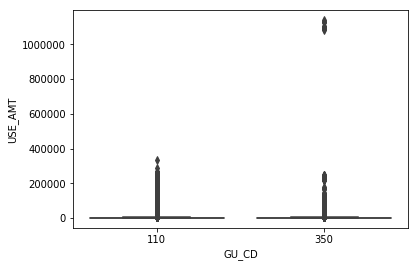

In [20]:
ax = sns.boxplot(x="GU_CD", y="USE_AMT", data=card )

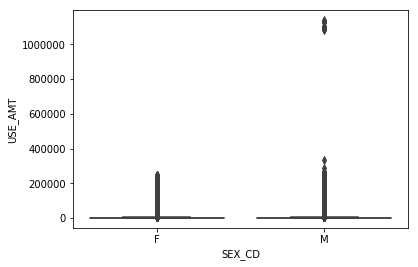

In [21]:
ax = sns.boxplot(x="SEX_CD", y="USE_AMT", data=card )

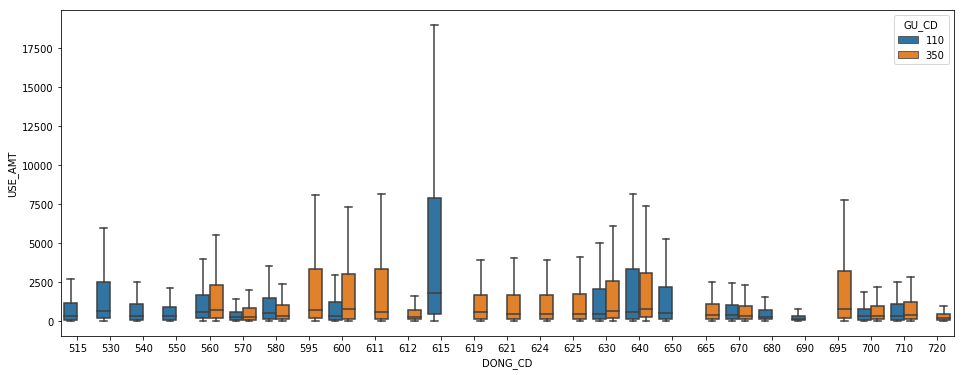

In [22]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="DONG_CD", y="USE_AMT", hue="GU_CD", data=card, showfliers=False )

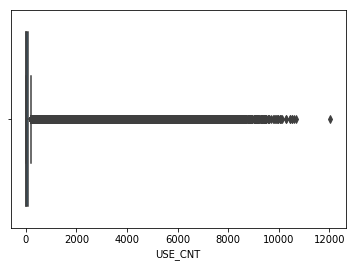

In [23]:
sns.boxplot(card['USE_CNT'].dropna())
# median 값을 쓰겠다 

In [24]:
e=card['USE_CNT']

q1, q3= np.percentile(e,[25,75])

iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

len(e[(e>upper_bound)])/len(e[(e<upper_bound)])

0.1503533285581415

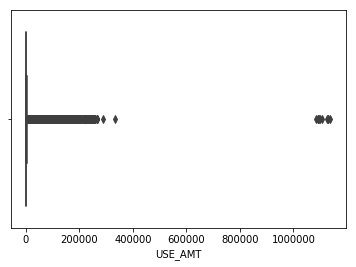

In [25]:
sns.boxplot(card['USE_AMT'].dropna())
# median 값을 쓰겠다 

In [26]:
e=card['USE_AMT']

q1, q3= np.percentile(e,[25,75])

iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 


print(upper_bound)

len(e[(e>upper_bound)])/len(e[(e<upper_bound)])

3947.5


0.15030705658453913

## 이상치 제거 

In [27]:
card = card[(card['USE_AMT']<upper_bound)]

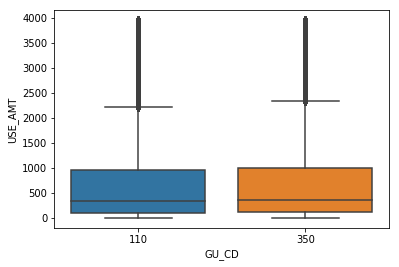

In [28]:
ax = sns.boxplot(x="GU_CD", y="USE_AMT", data=card )

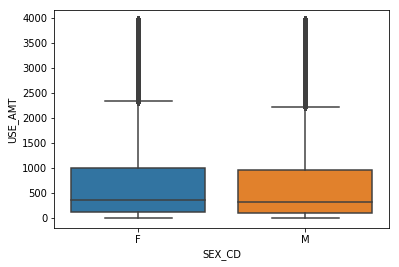

In [29]:
ax = sns.boxplot(x="SEX_CD", y="USE_AMT", data=card )

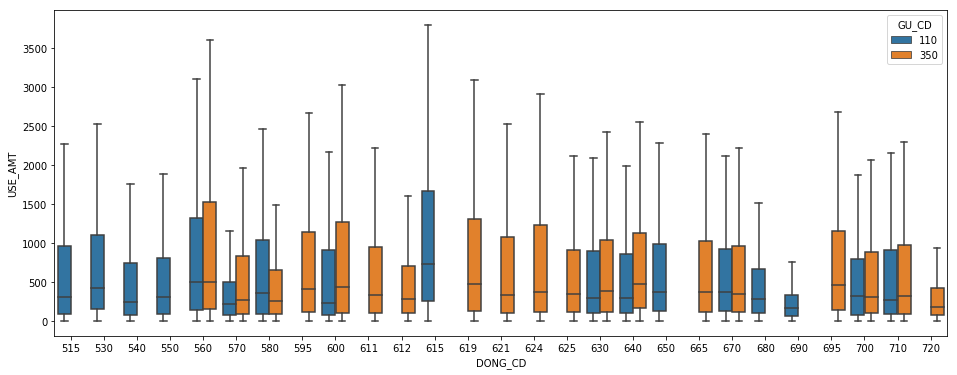

In [30]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="DONG_CD", y="USE_AMT", hue="GU_CD", data=card, showfliers=False )

# 구동별 집계

card.AGE_CD = card.AGE_CD.astype('int')       

In [31]:
group = card.groupby(['GU_CD','DONG_CD']).agg({'AGE_CD':['mean'],'USE_CNT':['mean','count'],'USE_AMT':['mean']})
group.columns = ["_".join(x) for x in group.columns.ravel()]

In [32]:
b = df_GU.sort_values(by=['GU_CD',"DONG_CD"], ascending = False)

In [33]:
a = group.reset_index().sort_values(by=['GU_CD',"DONG_CD"], ascending = False)

In [34]:
a['GU_CD']=a['GU_CD'].astype(int)
a['DONG_CD']=a['DONG_CD'].astype(int)
b['GU_CD']=b['GU_CD'].astype(int)
b['DONG_CD']=b['DONG_CD'].astype(int)

In [35]:
df_gudong= pd.merge(a,b)

In [36]:
colname =['GU_CD', 'DONG_CD','GU', 'DONG', 'AGE_CD_mean','USE_CNT_mean',
       'USE_CNT_count', 'USE_AMT_mean']

In [37]:
df_gudong=df_gudong.reindex(columns = colname)

In [38]:
df_gudong

GU_CD  DONG_CD   GU         DONG  AGE_CD_mean  USE_CNT_mean  \
0     350      720  노원구        상계10동    40.583032     24.085565   
1     350      710  노원구         상계9동    41.466201     52.448530   
2     350      700  노원구         상계8동    42.037979     47.220467   
3     350      695  노원구       상계6.7동    42.340886     51.427868   
4     350      670  노원구         상계5동    42.178895     45.940890   
5     350      665  노원구       상계3.4동    42.650097     42.174294   
6     350      640  노원구         상계2동    41.732116     35.410037   
7     350      630  노원구         상계1동    41.525297     40.671943   
8     350      625  노원구       중계2.3동    42.345299     41.467515   
9     350      624  노원구         중계4동    41.938389     48.390836   
10    350      621  노원구         중계1동    41.739089     49.988476   
11    350      619  노원구         중계본동    41.705184     53.220511   
12    350      612  노원구         하계2동    41.504244     43.272209   
13    350      611  노원구         하계1동    40.931086     50.946047   
14    350      600  노원구         공릉2동    41.579143     58.913259   
15    350      595  노원구         공릉1동    41.724663     38.896685   
16    350      580  노원구         월계3동    41.304245     34.388812   
17    350      570  노원구         월계2동    41.921778     55.719661   
18    350      560  노원구         월계1동    41.980927     68.180159   
19    110      710  종로구         숭인2동    41.723827     49.175877   
20    110      700  종로구         숭인1동    40.113658     37.386216   
21    110      690  종로구         창신3동    41.560918     19.684339   
22    110      680  종로구         창신2동    42.073396     25.193954   
23    110      670  종로구         창신1동    42.547500     41.849902   
24    110      650  종로구          혜화동    40.496606     49.872144   
25    110      640  종로구          이화동    39.399057     55.345078   
26    110      630  종로구      종로5.6가동    42.762941     36.265549   
27    110      615  종로구  종로1.2.3.4가동    42.533502     43.077731   
28    110      600  종로구          가회동    40.842484     45.692408   
29    110      580  종로구          교남동    41.418739     50.564054   
30    110      570  종로구          무악동    41.261432     26.547482   
31    110      560  종로구          평창동    42.771343     48.727411   
32    110      550  종로구          부암동    42.464844     44.987635   
33    110      540  종로구          삼청동    41.107230     34.099028   
34    110      530  종로구          사직동    41.808782     50.786047   
35    110      515  종로구        청운효자동    41.492321     48.605437   

    USE_CNT_count  USE_AMT_mean  
0           46970    307.365361  
1           42102    692.666263  
2           49132    650.218310  
3           61748    829.172491  
4           54982    653.051653  
5           44138    684.851692  
6           74103    815.795703  
7           70878    751.341657  
8           63429    689.285406  
9           52247    824.575478  
10          52240    739.759571  
11          54088    844.144616  
12          38408    515.081337  
13          45651    749.916541  
14          59222    867.902519  
15          68654    821.366985  
16          46709    502.026290  
17          39388    583.350132  
18          57044    958.416871  
19          55954    669.319566  
20          31762    516.161671  
21          25879    245.568376  
22          39035    517.457103  
23          59368    695.909412  
24          70126    766.178750  
25          52817    672.587955  
26          68447    680.835069  
27          79621   1083.445171  
28          42072    654.074040  
29          37484    681.185359  
30          31928    433.663712  
31          52581    875.264487  
32          37120    628.151051  
33          46088    590.293916  
34          66636    802.125578  
35          53591    704.093691

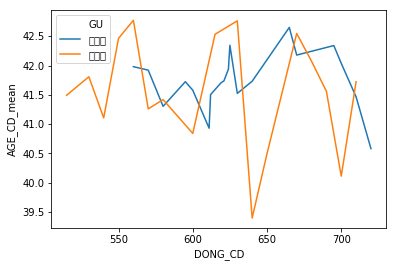

In [39]:
sns.lineplot(x="DONG_CD", y="AGE_CD_mean", hue = "GU", data= df_gudong)

In [40]:
df_gudong[['GU','DONG_CD','DONG','AGE_CD_mean']].sort_values(by=['AGE_CD_mean'], ascending = False).head()

GU  DONG_CD         DONG  AGE_CD_mean
31  종로구      560          평창동    42.771343
26  종로구      630      종로5.6가동    42.762941
5   노원구      665       상계3.4동    42.650097
23  종로구      670         창신1동    42.547500
27  종로구      615  종로1.2.3.4가동    42.533502

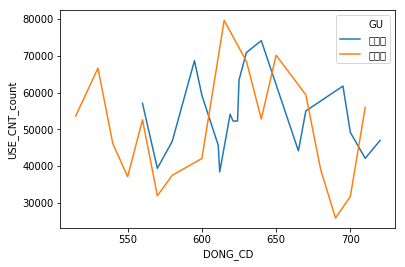

In [41]:
sns.lineplot(x="DONG_CD", y="USE_CNT_count", hue = "GU", data= df_gudong)

In [42]:
df_gudong[['GU','DONG_CD','DONG','USE_CNT_count']].sort_values(by=['USE_CNT_count'], ascending = False).head()

GU  DONG_CD         DONG  USE_CNT_count
27  종로구      615  종로1.2.3.4가동          79621
6   노원구      640         상계2동          74103
7   노원구      630         상계1동          70878
24  종로구      650          혜화동          70126
15  노원구      595         공릉1동          68654

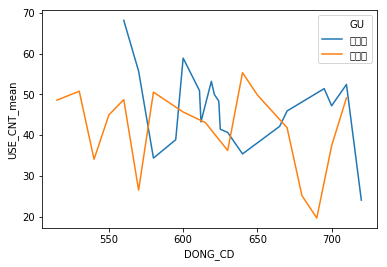

In [43]:
sns.lineplot(x="DONG_CD", y="USE_CNT_mean", hue = "GU", data= df_gudong)

In [44]:
df_gudong[['GU','DONG_CD','DONG','USE_CNT_mean']].sort_values(by=['USE_CNT_mean'], ascending = False).head()

GU  DONG_CD  DONG  USE_CNT_mean
18  노원구      560  월계1동     68.180159
14  노원구      600  공릉2동     58.913259
17  노원구      570  월계2동     55.719661
25  종로구      640   이화동     55.345078
11  노원구      619  중계본동     53.220511

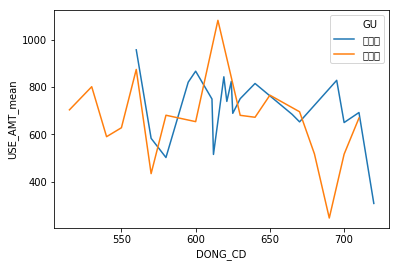

In [45]:
sns.lineplot(x="DONG_CD", y="USE_AMT_mean", hue = "GU", data= df_gudong)

In [46]:
df_gudong[['GU','DONG_CD','DONG','USE_AMT_mean']].sort_values(by=['USE_AMT_mean'], ascending = False).head()

GU  DONG_CD         DONG  USE_AMT_mean
27  종로구      615  종로1.2.3.4가동   1083.445171
18  노원구      560         월계1동    958.416871
31  종로구      560          평창동    875.264487
14  노원구      600         공릉2동    867.902519
11  노원구      619         중계본동    844.144616

# 구매 분야별 집계

In [47]:
group = round(card.groupby(["GU_CD",'DONG_CD',"MCT_CAT_CD"])[["USE_AMT"]].mean(), 3).sort_values(by=["USE_AMT"], ascending = False).reset_index()

In [48]:
group.head(10)

GU_CD DONG_CD MCT_CAT_CD   USE_AMT
0   110     530         80  3350.269
1   350     630         80  3322.805
2   350     595         40  3171.591
3   350     625         32  3143.000
4   350     710         62  3087.000
5   350     625         40  3076.769
6   110     630         80  3073.014
7   350     630         40  3036.046
8   350     640         80  2965.395
9   350     640         40  2964.862

In [49]:
print(df_GU[(df_GU['GU_CD']=='350')&(df_GU['DONG_CD']=='640')])

print(cate[cate['MCT_CAT_CD']=='80'])

   GU_CD DONG_CD   GU  DONG
29   350     640  노원구  상계2동
    NAME MCT_CAT_CD
20  요식업소         80


- 사람들이 노원구(350)보다 종로구(110)에서 돈을 더 많이 쓴다.

- 종로구에서는 1,2,3,4가동, 이화동, 사직동에서 돈을 많이 쓴다. 
- 노원구에서는 상계6,7동, 하계1동, 상계2동에서 돈을 많이 쓴다.

In [50]:
group['GU_CD']=group['GU_CD'].astype('int')

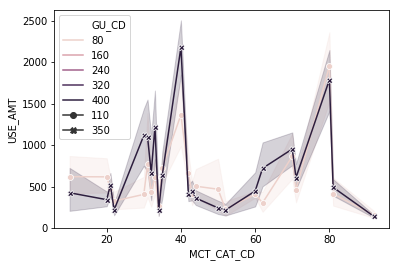

In [51]:
sns.lineplot(x="MCT_CAT_CD", y="USE_AMT", hue = "GU_CD", style="GU_CD",
            markers=True, dashes=False, data= group)

구별 판매 실적 분류
- 종로구(110): 서적문구(50), 의료기관(70), 요식업소(80)
- 노원구(350): 가구(30)', 전기(31), 연료판매(33), 가전(35), 유통업(40), 자동차판매(60)

In [52]:
card.head()

STD_DD GU_CD DONG_CD MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0 2018-04-01   110     515         21      F      30        4      180
1 2018-04-01   110     515         21      F      55        4       22
2 2018-04-01   110     515         21      M      20       35      184
3 2018-04-01   110     515         21      M      25       70      425
4 2018-04-01   110     515         21      M      30       18       82

In [53]:
group = round(card.groupby(["SEX_CD",'AGE_CD',"MCT_CAT_CD"])[["USE_AMT"]].mean(), 3).sort_values(by=["USE_AMT"], ascending = False).reset_index()

In [54]:
group.head()

SEX_CD  AGE_CD MCT_CAT_CD   USE_AMT
0      M      45         40  1777.775
1      M      45         80  1729.735
2      M      40         40  1713.302
3      M      35         40  1711.569
4      M      40         80  1706.940

['숙박(10)',
 '레저용품(20)',
 '레저업소(21)',
 '문화취미(22)',
 '가구(30)',
 '전기(31)',
 '주방용구(32)',
 '연료판매(33)',
 '광학제품(34)',
 '가전(35)',
 '유통업(40)',
 '의복(42)',
 '직물(43)',
 '신변잡화(44)',
 '서적문구(50)',
 '사무통신(52)',
 '자동차판매(60)',
 '자동차정비(62)',
 '의료기관(70)',
 '보건위생(71)',
 '요식업소(80)',
 '음료식품(81)',
 '수리서비스(92)']

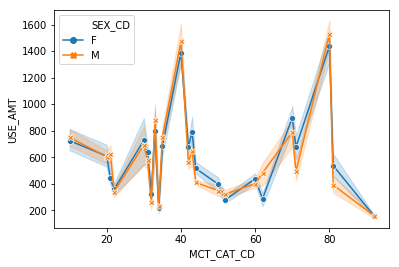

In [55]:
sns.lineplot(x="MCT_CAT_CD", y="USE_AMT", hue = "SEX_CD", style="SEX_CD",
            markers=True, dashes=False, data= group)

성별별 판매실적 분류
- 여성: 유통(40)
- 남성: 광학제품(34), 요식업소(80)

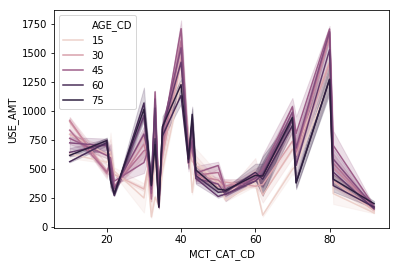

In [56]:
sns.lineplot(x="MCT_CAT_CD", y="USE_AMT", hue = "AGE_CD",
            markers=True, dashes=False, data= group)

* 나이별 판매실적 분류
- 유통업(40): 30-45 세가 많이 다님
- 의료기관(70): 나이가 많을 수록 많이 다님 
- 요식업소(80): 젊은 사람들이 많이 다님

'숙박(10)',
'레저용품(20)',
'레저업소(21)',
'문화취미(22)',
 '가구(30)',
 '전기(31)',
 '주방용구(32)',
 '연료판매(33)',
 '광학제품(34)',
 '가전(35)',
 '유통업(40)',
 '의복(42)',
 '직물(43)',
 '신변잡화(44)',
 '서적문구(50)',
 '사무통신(52)',
 '자동차판매(60)',
 '자동차정비(62)',
 '의료기관(70)',
 '보건위생(71)',
 '요식업소(80)',
 '음료식품(81)',
 '수리서비스(92)'

## 상품별 시계열 시각화

In [57]:
card.AGE_CD = card.AGE_CD.astype('int')

In [58]:
group = card.groupby(['STD_DD','GU_CD','MCT_CAT_CD']).agg({'AGE_CD':['mean'],'USE_CNT':['mean'],'USE_AMT':['mean']})
group.columns = ["_".join(x) for x in group.columns.ravel()]
a = group.reset_index().sort_values(by=['STD_DD','GU_CD','MCT_CAT_CD'], ascending = True)

In [59]:
def cate_GU(GU, i=[70,80,40]):
    b=a.loc[(a.GU_CD == GU)]
    b= b[['STD_DD','MCT_CAT_CD','AGE_CD_mean','USE_CNT_mean' ,'USE_AMT_mean']].dropna()
    b['STD_DD']=pd.to_datetime(b['STD_DD'])
    b = b.groupby(['STD_DD','MCT_CAT_CD']).agg({'AGE_CD_mean':['mean'],'USE_CNT_mean':['mean'],'USE_AMT_mean':['mean']})
    b.columns = ["_".join(x) for x in b.columns.ravel()]
    b.reset_index(inplace=True)
    b.rename(columns={'STD_DD':'Date'}, inplace=True)
    b = b.set_index('Date')
    b.index = b.index.astype(str)

    print(b[['MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique())
    c=b.groupby([b.index,'MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    c.reset_index(inplace=True)
    c = c[['Date','MCT_CAT_CD','USE_AMT_mean_mean']]
    
    c = c[c.MCT_CAT_CD.isin(i)].pivot_table(index=['Date'], columns='MCT_CAT_CD', aggfunc= lambda x: x)
    print(c.plot(figsize=(16,9)))
    cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('int')
    print(cate[cate.MCT_CAT_CD.isin(i)])

[31, 30, 32, 80, 35, ..., 71, 22, 92, 33, 62]
Length: 23
Categories (23, int64): [31, 30, 32, 80, ..., 22, 92, 33, 62]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
5     전기          31
6   주방용구          32
9     가전          35
20  요식업소          80
[31, 60, 40, 30, 80, ..., 22, 20, 52, 44, 92]
Length: 23
Categories (23, int64): [31, 60, 40, 30, ..., 20, 52, 44, 92]
AxesSubplot(0.125,0.125;0.775x0.755)
     NAME  MCT_CAT_CD
5      전기          31
10    유통업          40
16  자동차판매          60
20   요식업소          80


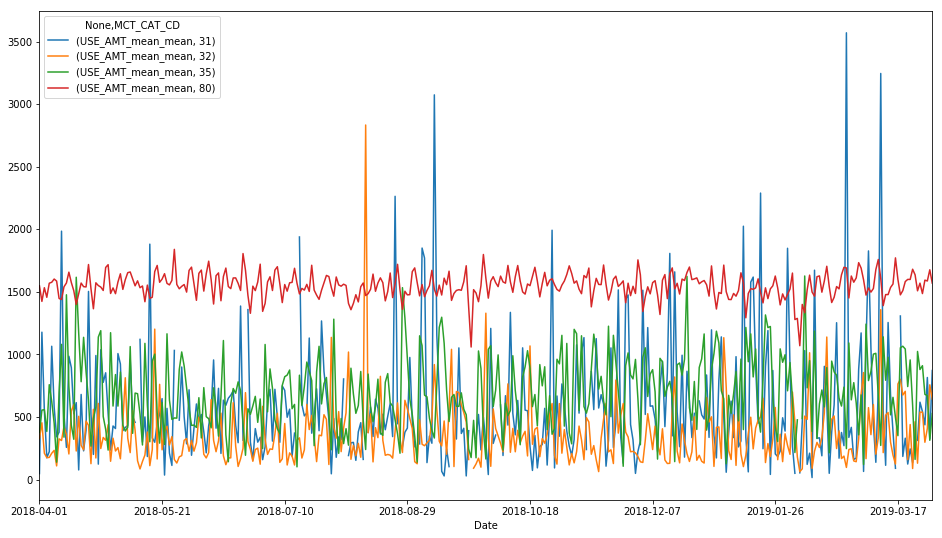

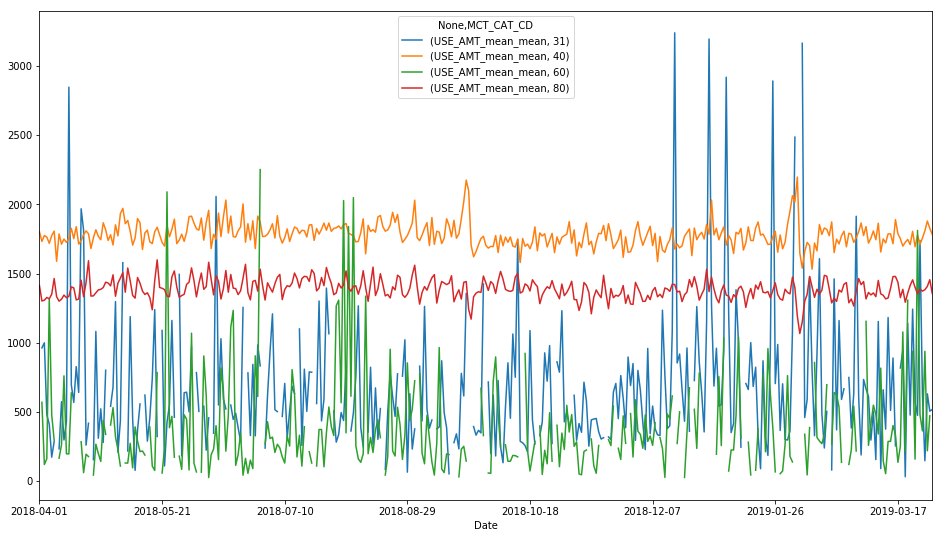

In [60]:
# 종로구	615	종로1.2.3.4가동	1746.0
cate_GU(110, [31,32, 80, 35]) # 종로구 - 전기, 의료기관, 가구, 요식업소, 수리서비스, 유통업
cate_GU(350, [31,60,40, 80]) # 노원구 - 연료판매, 자동차판매, 유통업, 전기, 주방용구

### 동별 상품별 시계열 시각화

In [61]:
group = card.groupby(['STD_DD','GU_CD','DONG_CD','MCT_CAT_CD']).agg({'AGE_CD':['mean'],'USE_CNT':['mean'],'USE_AMT':['mean']})
group.columns = ["_".join(x) for x in group.columns.ravel()]
a = group.reset_index().sort_values(by=['STD_DD','GU_CD',"DONG_CD",'MCT_CAT_CD'], ascending = True)

In [62]:
def cate_time(GU, DONG, i=[70,80,40]):
    b=a.loc[(a.GU_CD == GU)]
    b= b[['STD_DD','DONG_CD','MCT_CAT_CD','AGE_CD_mean','USE_CNT_mean' ,'USE_AMT_mean']].dropna()
    b['STD_DD']=pd.to_datetime(b['STD_DD'])
    b = b.groupby(['STD_DD','DONG_CD','MCT_CAT_CD']).agg({'AGE_CD_mean':['mean'],'USE_CNT_mean':['mean'],'USE_AMT_mean':['mean']})
    b.columns = ["_".join(x) for x in b.columns.ravel()]
    b.reset_index(inplace=True)
    b.rename(columns={'STD_DD':'Date'}, inplace=True)
    b = b.set_index('Date')
    b.index = b.index.astype(str)

    c=b[(b['DONG_CD'] == DONG)]
    print(c[['MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique())
    c=c.groupby([c.index,'MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    c.reset_index(inplace=True)
    c = c[['Date','MCT_CAT_CD','USE_AMT_mean_mean']]
    
    c = c[c.MCT_CAT_CD.isin(i)].pivot_table(index=['Date'], columns='MCT_CAT_CD', aggfunc= lambda x: x)
    print(c.plot(figsize=(16,9)))
    cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('int')
    print(cate[cate.MCT_CAT_CD.isin(i)])

In [63]:
df_gudong[['GU','DONG_CD','DONG','USE_AMT_mean']].sort_values(by=['USE_AMT_mean'], ascending = False).head(10)

GU  DONG_CD         DONG  USE_AMT_mean
27  종로구      615  종로1.2.3.4가동   1083.445171
18  노원구      560         월계1동    958.416871
31  종로구      560          평창동    875.264487
14  노원구      600         공릉2동    867.902519
11  노원구      619         중계본동    844.144616
3   노원구      695       상계6.7동    829.172491
9   노원구      624         중계4동    824.575478
15  노원구      595         공릉1동    821.366985
6   노원구      640         상계2동    815.795703
34  종로구      530          사직동    802.125578

- 종로구

[70, 40, 50, 32, 35, ..., 60, 92, 62, 34, 33]
Length: 22
Categories (22, int64): [70, 40, 50, 32, ..., 92, 62, 34, 33]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
10   유통업          40
14  서적문구          50
18  의료기관          70


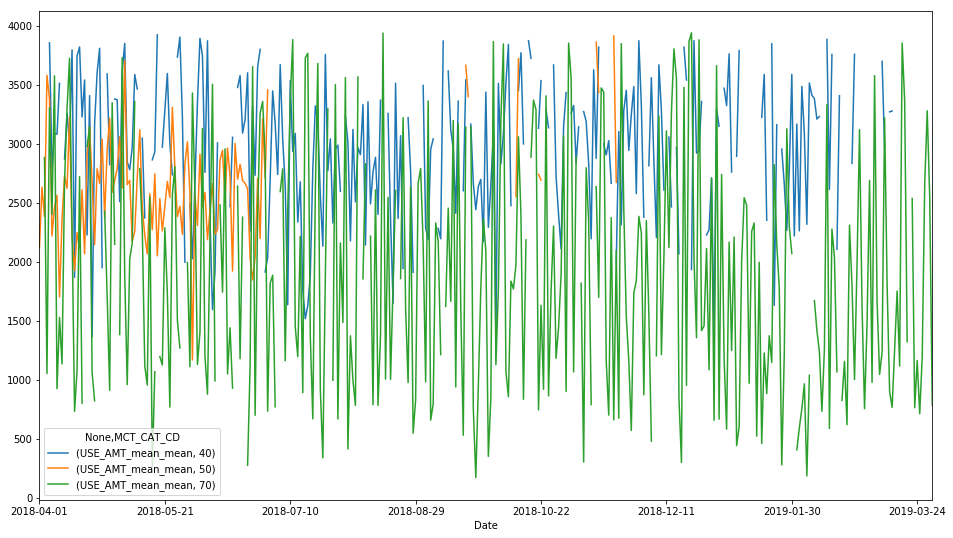

In [64]:
# 종로구	615	종로1.2.3.4가동	1746.0
cate_time(110,615,[40,70,50])

[50, 34, 42, 32, 31, ..., 71, 81, 70, 43, 30]
Length: 21
Categories (21, int64): [50, 34, 42, 32, ..., 81, 70, 43, 30]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
8   광학제품          34
13  신변잡화          44
14  서적문구          50


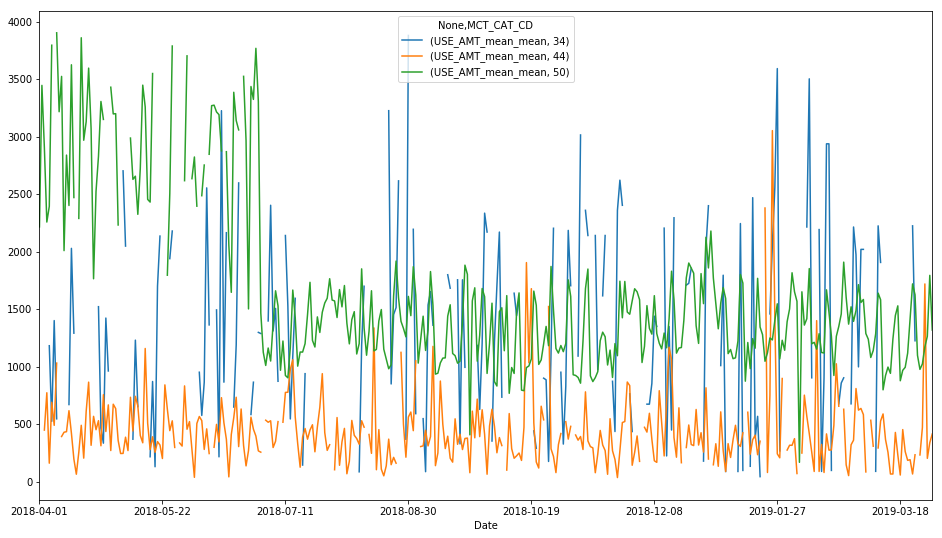

In [65]:
# 종로구	560	평창동	642.0
cate_time(110,560,[50,34,44])

[80, 70, 35, 40, 10, ..., 34, 92, 22, 20, 62]
Length: 19
Categories (19, int64): [80, 70, 35, 40, ..., 92, 22, 20, 62]
AxesSubplot(0.125,0.125;0.775x0.755)
     NAME  MCT_CAT_CD
16  자동차판매          60
18   의료기관          70
20   요식업소          80


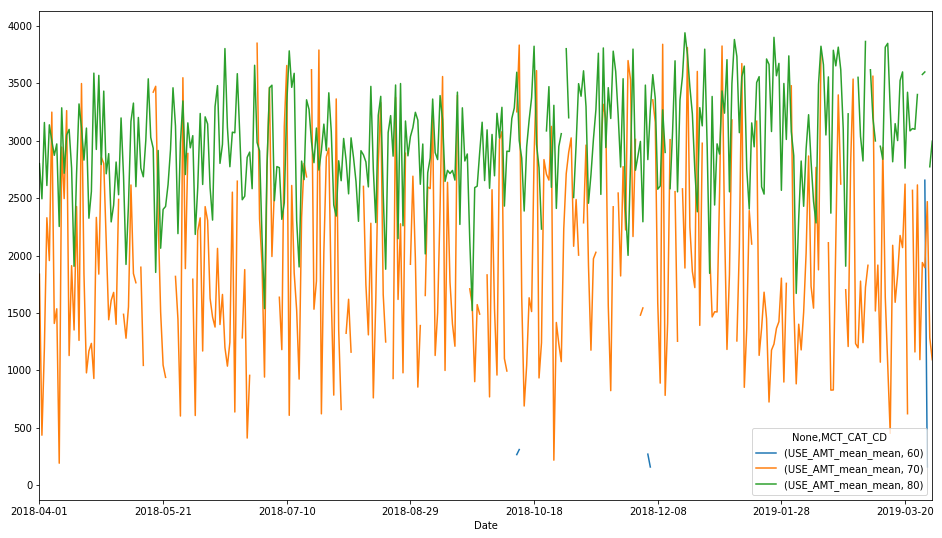

In [66]:
# 종로구	640	이화동	632.0
cate_time(110,640,[70,60,80])

- 노원구

[70, 34, 80, 32, 31, ..., 10, 50, 92, 62, 22]
Length: 20
Categories (20, int64): [70, 34, 80, 32, ..., 50, 92, 62, 22]
AxesSubplot(0.125,0.125;0.775x0.755)
     NAME  MCT_CAT_CD
6    주방용구          32
7    연료판매          33
16  자동차판매          60
18   의료기관          70
20   요식업소          80


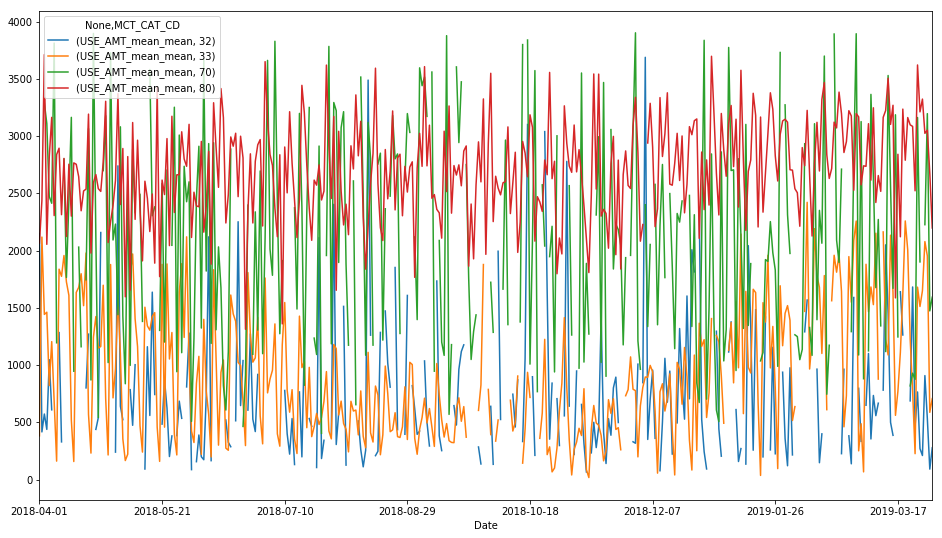

In [67]:
# 노원구	695	상계6.7동	896.
cate_time(350,695,[33,32,60,70,80])

[80, 40, 60, 30, 32, ..., 20, 42, 22, 10, 50]
Length: 23
Categories (23, int64): [80, 40, 60, 30, ..., 42, 22, 10, 50]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
4     가구          30
6   주방용구          32
12    직물          43


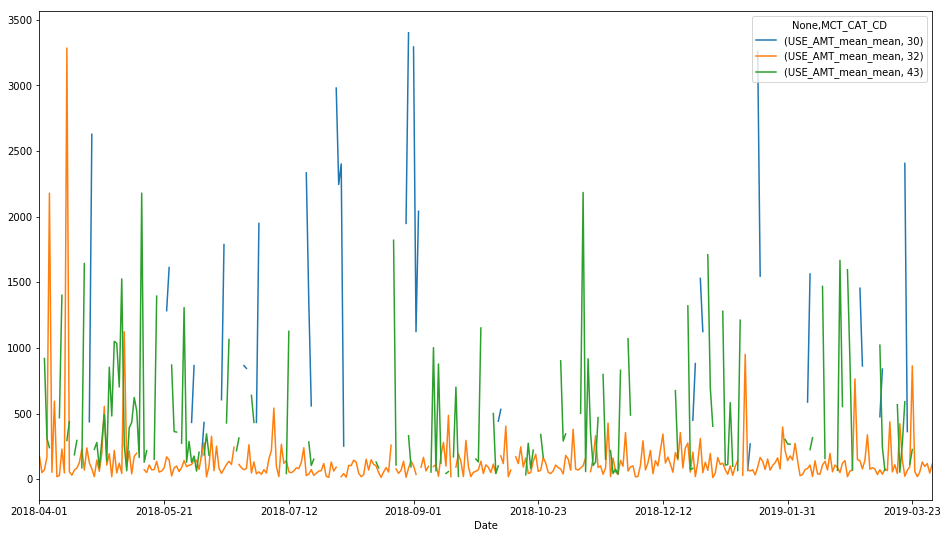

In [68]:
# 노원구	595	공릉1동	794.0
cate_time(350,595,[43,32,30])

[44, 40, 60, 31, 34, ..., 92, 20, 62, 52, 22]
Length: 22
Categories (22, int64): [44, 40, 60, 31, ..., 20, 62, 52, 22]
AxesSubplot(0.125,0.125;0.775x0.755)
     NAME  MCT_CAT_CD
5      전기          31
15   사무통신          52
16  자동차판매          60


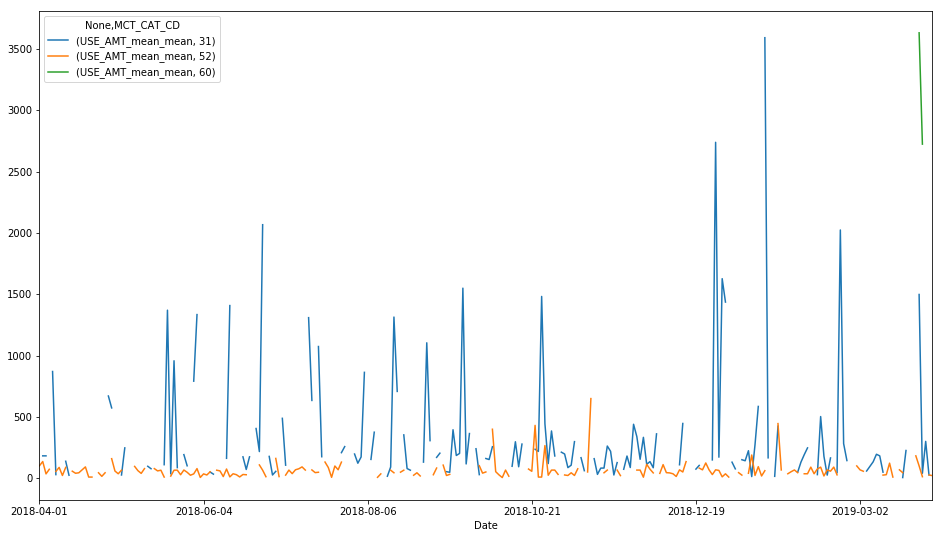

In [69]:
# 노원구	600	공릉2동	723.0
cate_time(350,600,[60,31,52])

In [70]:
# 20, 30,40, 50 대 .. 나누기

### 카테고리,동별, 성별 시계열 시각화

In [71]:
card.head()

STD_DD GU_CD DONG_CD MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0 2018-04-01   110     515         21      F      30        4      180
1 2018-04-01   110     515         21      F      55        4       22
2 2018-04-01   110     515         21      M      20       35      184
3 2018-04-01   110     515         21      M      25       70      425
4 2018-04-01   110     515         21      M      30       18       82

In [72]:
card.AGE_CD = card.AGE_CD.astype('int')

In [73]:
group = card.groupby(['STD_DD','GU_CD','DONG_CD','SEX_CD','MCT_CAT_CD']).agg({'AGE_CD':['mean'],'USE_CNT':['mean'],'USE_AMT':['mean']})
group.columns = ["_".join(x) for x in group.columns.ravel()]
a = group.reset_index().sort_values(by=['STD_DD','GU_CD',"DONG_CD",'SEX_CD','MCT_CAT_CD'], ascending = True)

In [74]:
def cate_sex_time(GU, DONG, SEX='F', i=[70,80,40]):

    b=a.loc[(a.GU_CD == GU)]
    b= b[['STD_DD','DONG_CD','SEX_CD','MCT_CAT_CD','AGE_CD_mean','USE_CNT_mean' ,'USE_AMT_mean']].dropna()
    b['STD_DD']=pd.to_datetime(b['STD_DD'])
    b = b.groupby(['STD_DD','DONG_CD','SEX_CD','MCT_CAT_CD']).agg({'AGE_CD_mean':['mean'],'USE_CNT_mean':['mean'],'USE_AMT_mean':['mean']})
    b.columns = ["_".join(x) for x in b.columns.ravel()]
    b.reset_index(inplace=True)
    b.rename(columns={'STD_DD':'Date'}, inplace=True)
#     b = b.set_index('Date')
#     b.index = b.index.astype(str)

    c=b[(b['DONG_CD'] == DONG)]
#     print(c[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).head())
    c = c.groupby(['Date','SEX_CD','MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    c.reset_index(inplace=True)
#     c.set_index('Date', inplace= True)
#     c.index = c.index.astype(str)
    c = c[['Date','SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']]
#     c['USE_AMT_mean_mean'].fillna(0, inplace=True)

    d = c[(c['SEX_CD']== SEX)]
    print(d[['MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique())
    d=d.groupby(['Date','SEX_CD','MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    d.reset_index(inplace=True)
    d = d[['Date','SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']]
    d.head()

    d = d[d.MCT_CAT_CD.isin(i)].pivot_table(index=['Date'], columns=['SEX_CD','MCT_CAT_CD'], aggfunc= lambda x: x)
    print(d.plot(figsize=(16,9)))
    cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('int')
    print(cate[cate.MCT_CAT_CD.isin(i)])

In [75]:
def cate_sex_time(GU, DONG, SEX='F'):

    b=a.loc[(a.GU_CD == GU)]
    b= b[['STD_DD','DONG_CD','SEX_CD','MCT_CAT_CD','AGE_CD_mean','USE_CNT_mean' ,'USE_AMT_mean']].dropna()
    b['STD_DD']=pd.to_datetime(b['STD_DD'])
    b = b.groupby(['STD_DD','DONG_CD','SEX_CD','MCT_CAT_CD']).agg({'AGE_CD_mean':['mean'],'USE_CNT_mean':['mean'],'USE_AMT_mean':['mean']})
    b.columns = ["_".join(x) for x in b.columns.ravel()]
    b.reset_index(inplace=True)
    b.rename(columns={'STD_DD':'Date'}, inplace=True)
#     b = b.set_index('Date')
#     b.index = b.index.astype(str)

    c=b[(b['DONG_CD'] == DONG)]
    d = c[(c['SEX_CD']== SEX)]
    d=d.groupby(['Date','SEX_CD','MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    d.reset_index(inplace=True)
    d = d[['Date','SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']]
    print(d[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique())
    num = d[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique()
    num = num[:5]

    d = d[d.MCT_CAT_CD.isin(num[:3])].pivot_table(index=['Date'], columns=['SEX_CD','MCT_CAT_CD'], aggfunc= lambda x: x)
    print(d.plot(figsize=(16,9)))
    cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('int')
    print(cate[cate.MCT_CAT_CD.isin(num)])

In [76]:
df_gudong[['GU','DONG_CD','DONG','USE_AMT_mean']].sort_values(by=['USE_AMT_mean'], ascending = False).head()

GU  DONG_CD         DONG  USE_AMT_mean
27  종로구      615  종로1.2.3.4가동   1083.445171
18  노원구      560         월계1동    958.416871
31  종로구      560          평창동    875.264487
14  노원구      600         공릉2동    867.902519
11  노원구      619         중계본동    844.144616

[42, 40, 50, 70, 32, ..., 60, 34, 62, 33, 80]
Length: 23
Categories (23, int64): [42, 40, 50, 70, ..., 34, 62, 33, 80]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
6   주방용구          32
10   유통업          40
11    의복          42
14  서적문구          50
18  의료기관          70
[40, 70, 50, 44, 35, ..., 62, 92, 34, 33, 80]
Length: 23
Categories (23, int64): [40, 70, 50, 44, ..., 92, 34, 33, 80]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
9     가전          35
10   유통업          40
13  신변잡화          44
14  서적문구          50
18  의료기관          70


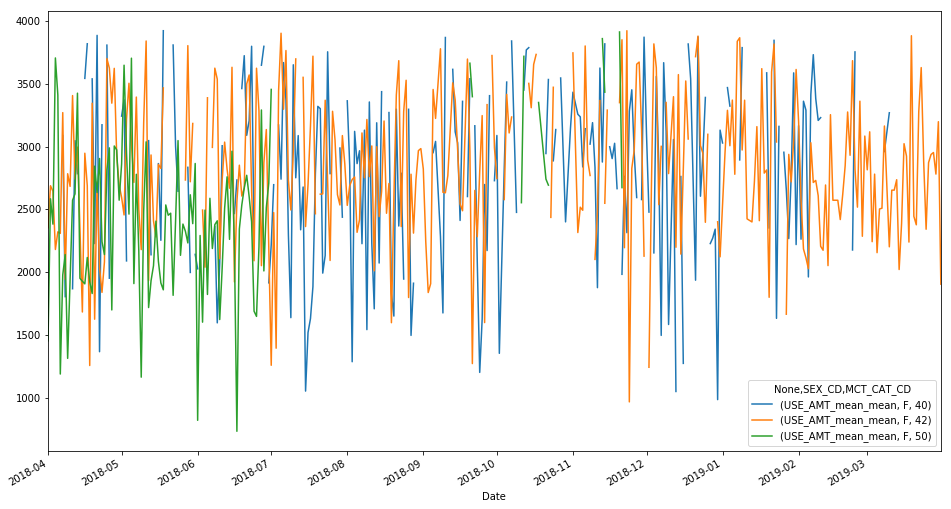

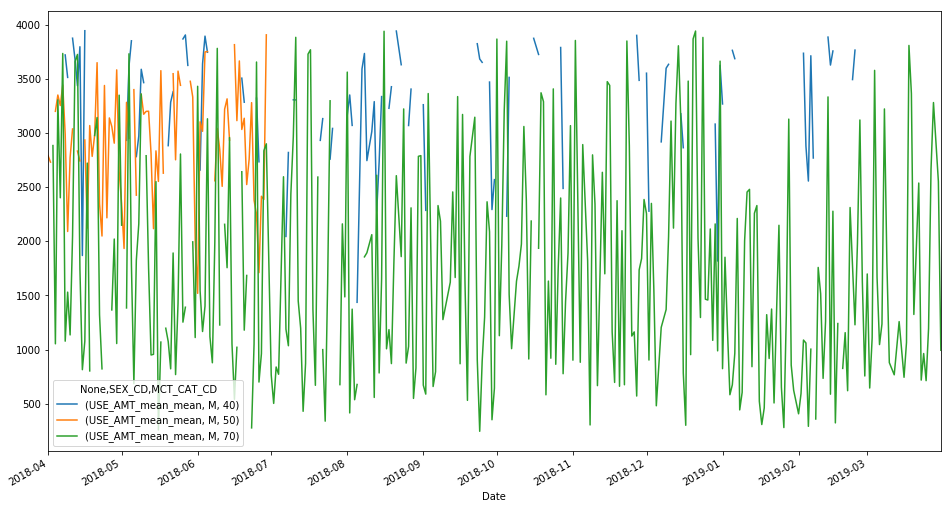

In [77]:
cate_sex_time(110,615,'F') # 110- 종로,[40,42,50]
cate_sex_time(110,615,'M') # 110- 종로,[70,30,40]

[80, 70, 32, 40, 33, ..., 22, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [80, 70, 32, 40, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
6   주방용구          32
7   연료판매          33
10   유통업          40
18  의료기관          70
20  요식업소          80
[80, 70, 34, 31, 44, ..., 92, 22, 30, 35, 60]
Length: 23
Categories (23, int64): [80, 70, 34, 31, ..., 22, 30, 35, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
5     전기          31
8   광학제품          34
13  신변잡화          44
18  의료기관          70
20  요식업소          80


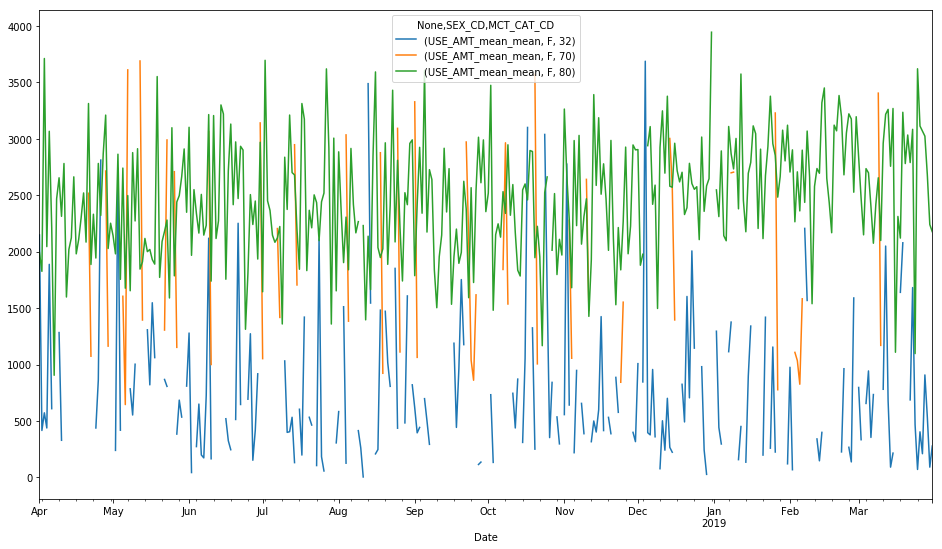

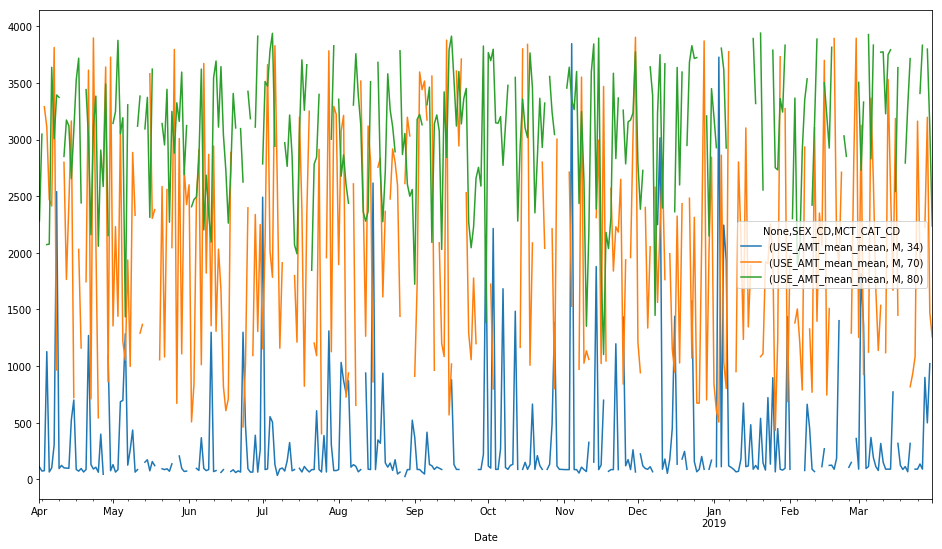

In [78]:
cate_sex_time(350,695,'F') # 350- 노원,[80,70,40]
cate_sex_time(350,695,'M') # 350- 노원,[80,70,32]

### 동별,성별,연령별,카테고리별 시계열 시각화

In [79]:
card.AGE_CD = card.AGE_CD.astype('category')

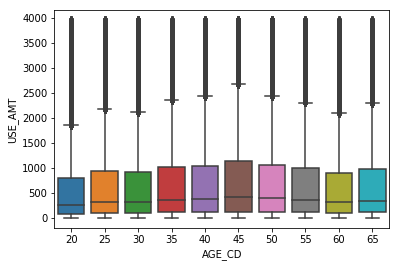

In [80]:
ax = sns.boxplot(x="AGE_CD", y="USE_AMT", data=card)

In [81]:
group = card.groupby(['STD_DD','GU_CD','DONG_CD','SEX_CD','AGE_CD','MCT_CAT_CD']).agg({'USE_CNT':['mean'],'USE_AMT':['mean']})
group.columns = ["_".join(x) for x in group.columns.ravel()]
a = group.reset_index().sort_values(by=['STD_DD','GU_CD',"DONG_CD",'SEX_CD','AGE_CD','MCT_CAT_CD'], ascending = True)

In [82]:
def cate_sex_age_time(GU, DONG, SEX='F', AGE=40): #i=[70,80,40]):

    b=a.loc[(a.GU_CD == GU)]
    b= b[['STD_DD','DONG_CD','SEX_CD','AGE_CD','MCT_CAT_CD','USE_CNT_mean' ,'USE_AMT_mean']].dropna()
    b['STD_DD']=pd.to_datetime(b['STD_DD'])
    b = b.groupby(['STD_DD','DONG_CD','SEX_CD','AGE_CD','MCT_CAT_CD']).agg({'AGE_CD':['count'],'USE_CNT_mean':['mean'],
                                                                            'USE_AMT_mean':['mean']})
    b.columns = ["_".join(x) for x in b.columns.ravel()]
    b.reset_index(inplace=True)
    b.rename(columns={'STD_DD':'Date'}, inplace=True)

    c = b[(b['DONG_CD'] == DONG)]
    d = c[(c['SEX_CD']== SEX)]
    e = d[(d['AGE_CD']== AGE)]  

    e = e.groupby(['Date','SEX_CD','AGE_CD','MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    e.reset_index(inplace=True)
    e = e[['Date','SEX_CD','AGE_CD','MCT_CAT_CD','USE_AMT_mean_mean']]
    print(e[['Date','SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique())
    num = e[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique()
    num = num[:5]
    
    e = e[e.MCT_CAT_CD.isin(num[:4])].pivot_table(index=['Date'], columns=['SEX_CD','AGE_CD','MCT_CAT_CD'], aggfunc= lambda x: x)
    

    print(e.plot(figsize=(16,7))) #9
 
    cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('int')
    print(cate[cate.MCT_CAT_CD.isin(num)])

[40, 70, 50, 71, 80, ..., 31, 32, 35, 43, 60]
Length: 23
Categories (23, int64): [40, 70, 50, 71, ..., 32, 35, 43, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
10   유통업          40
14  서적문구          50
18  의료기관          70
19  보건위생          71
20  요식업소          80


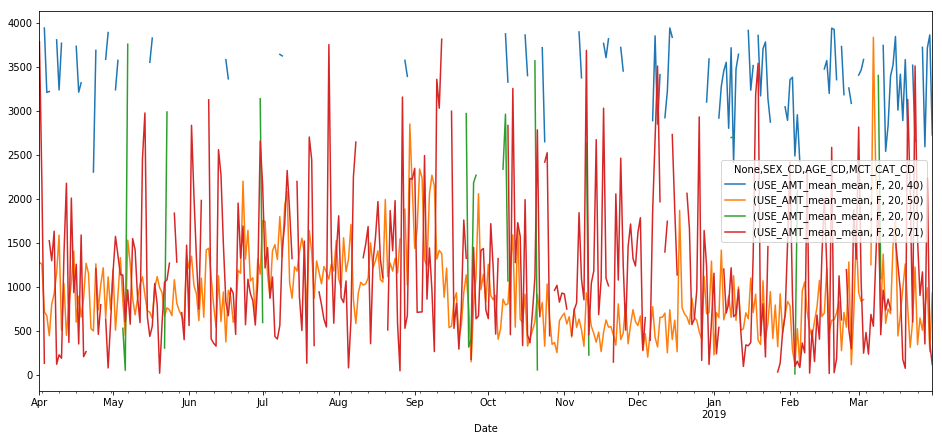

In [83]:
cate_sex_age_time(350, 695, SEX='F', AGE=20)

[40, 80, 10, 70, 71, ..., 31, 32, 35, 43, 60]
Length: 23
Categories (23, int64): [40, 80, 10, 70, ..., 32, 35, 43, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
0     숙박          10
10   유통업          40
18  의료기관          70
19  보건위생          71
20  요식업소          80


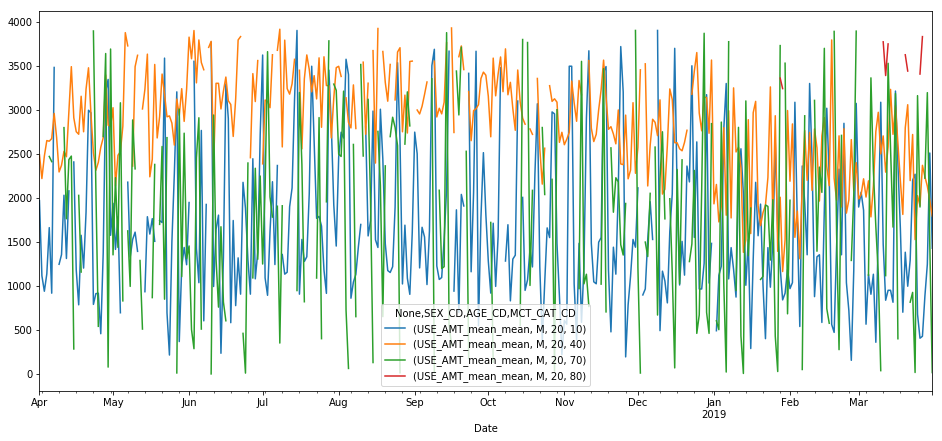

In [84]:
cate_sex_age_time(350, 695, SEX='M', AGE=20)

[40, 71, 81, 21, 33, ..., 31, 35, 43, 60, 80]
Length: 23
Categories (23, int64): [40, 71, 81, 21, ..., 35, 43, 60, 80]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
2   레저업소          21
7   연료판매          33
10   유통업          40
19  보건위생          71
21  음료식품          81


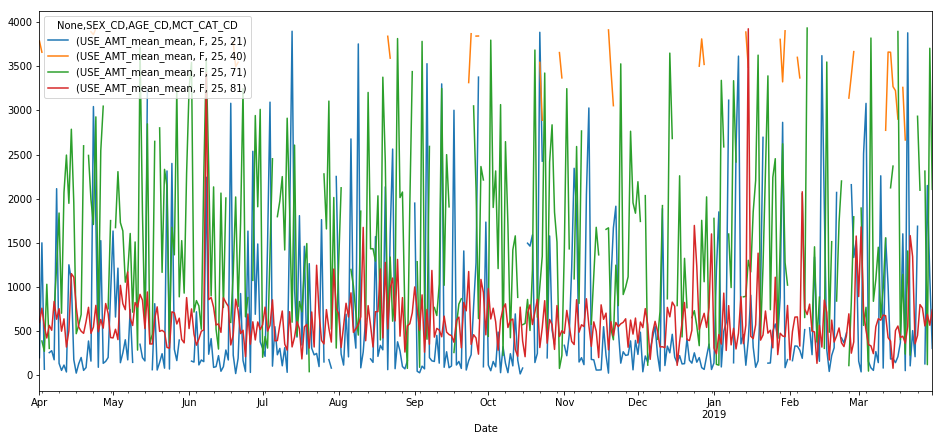

In [85]:
cate_sex_age_time(350, 695, SEX='F', AGE=25)

[40, 70, 21, 10, 71, ..., 32, 35, 43, 60, 80]
Length: 23
Categories (23, int64): [40, 70, 21, 10, ..., 35, 43, 60, 80]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
0     숙박          10
2   레저업소          21
10   유통업          40
18  의료기관          70
19  보건위생          71


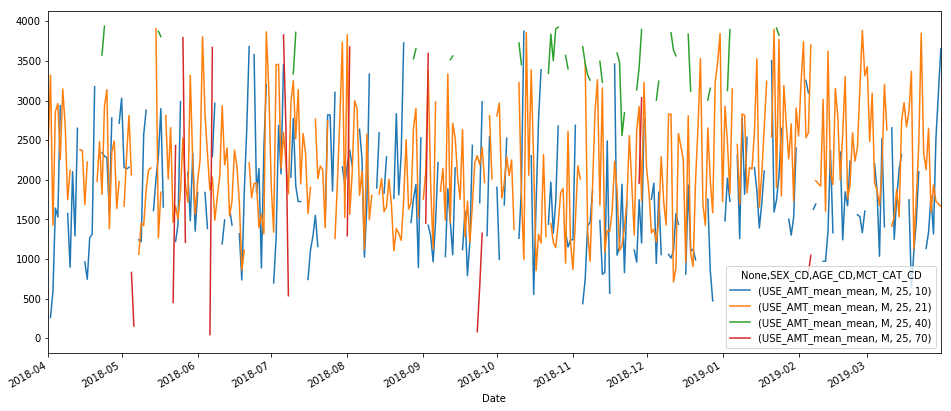

In [86]:
cate_sex_age_time(350, 695, SEX='M', AGE=25)

[40, 71, 33, 50, 80, ..., 22, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 71, 33, 50, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
7   연료판매          33
10   유통업          40
14  서적문구          50
19  보건위생          71
20  요식업소          80


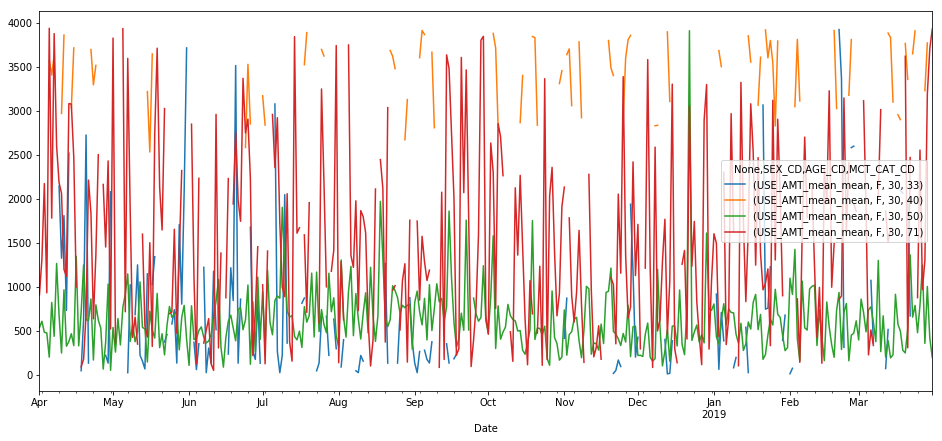

In [87]:
cate_sex_age_time(350, 695, SEX='F', AGE=30)

[40, 21, 10, 34, 70, ..., 30, 31, 35, 60, 80]
Length: 23
Categories (23, int64): [40, 21, 10, 34, ..., 31, 35, 60, 80]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
0     숙박          10
2   레저업소          21
8   광학제품          34
10   유통업          40
18  의료기관          70


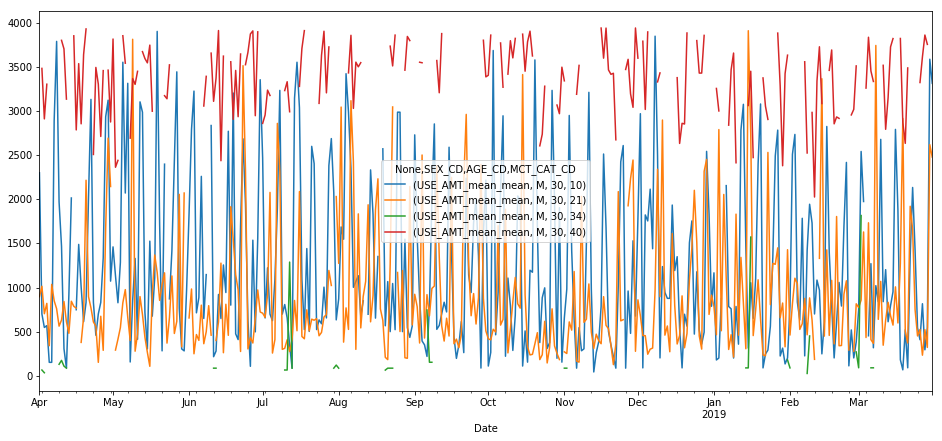

In [88]:
cate_sex_age_time(350, 695, SEX='M', AGE=30)

[40, 71, 33, 21, 34, ..., 32, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 71, 33, 21, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
2   레저업소          21
7   연료판매          33
8   광학제품          34
10   유통업          40
19  보건위생          71


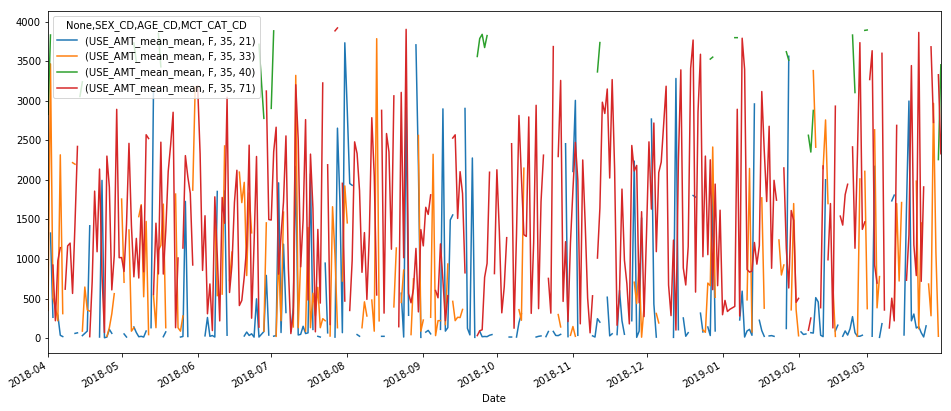

In [89]:
cate_sex_age_time(350, 695, SEX='F', AGE=35)

[40, 70, 71, 62, 21, ..., 30, 31, 35, 60, 80]
Length: 23
Categories (23, int64): [40, 70, 71, 62, ..., 31, 35, 60, 80]
AxesSubplot(0.125,0.2;0.775x0.68)
     NAME  MCT_CAT_CD
2    레저업소          21
10    유통업          40
17  자동차정비          62
18   의료기관          70
19   보건위생          71


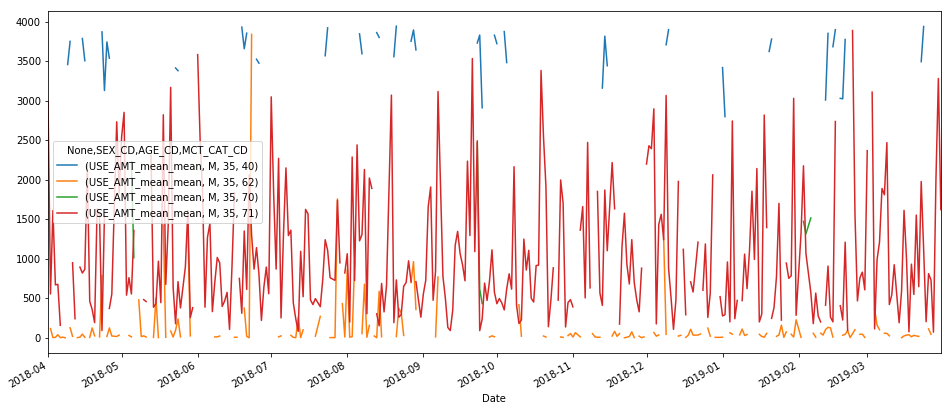

In [90]:
cate_sex_age_time(350, 695, SEX='M', AGE=35)

[40, 50, 70, 33, 71, ..., 52, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 50, 70, 33, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
7   연료판매          33
10   유통업          40
14  서적문구          50
18  의료기관          70
19  보건위생          71


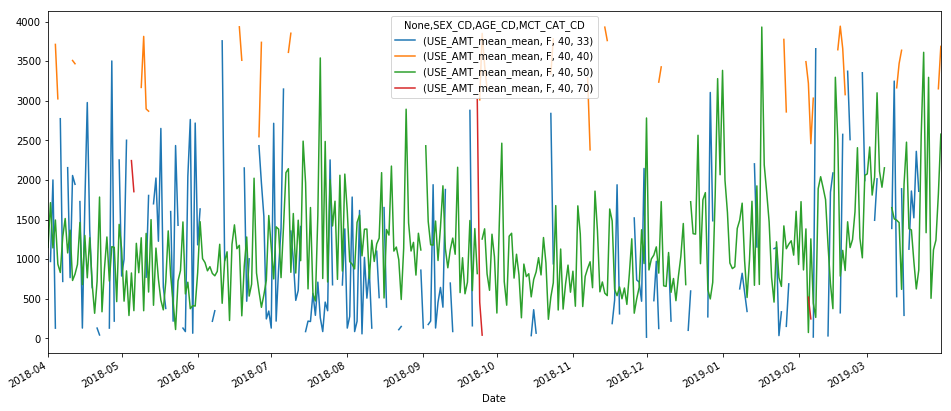

In [91]:
cate_sex_age_time(350, 695, SEX='F', AGE=40)

[40, 21, 34, 33, 81, ..., 30, 31, 35, 60, 80]
Length: 23
Categories (23, int64): [40, 21, 34, 33, ..., 31, 35, 60, 80]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
2   레저업소          21
7   연료판매          33
8   광학제품          34
10   유통업          40
21  음료식품          81


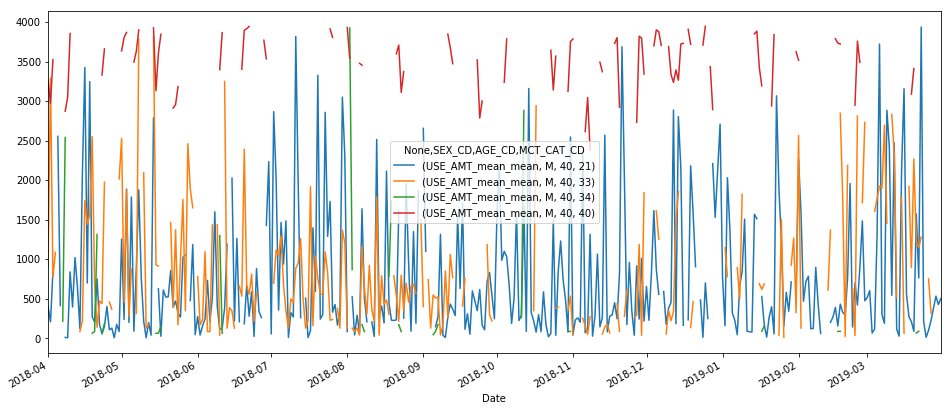

In [92]:
cate_sex_age_time(350, 695, SEX='M', AGE=40)

[71, 21, 50, 81, 33, ..., 22, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [71, 21, 50, 81, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
2   레저업소          21
7   연료판매          33
14  서적문구          50
19  보건위생          71
21  음료식품          81


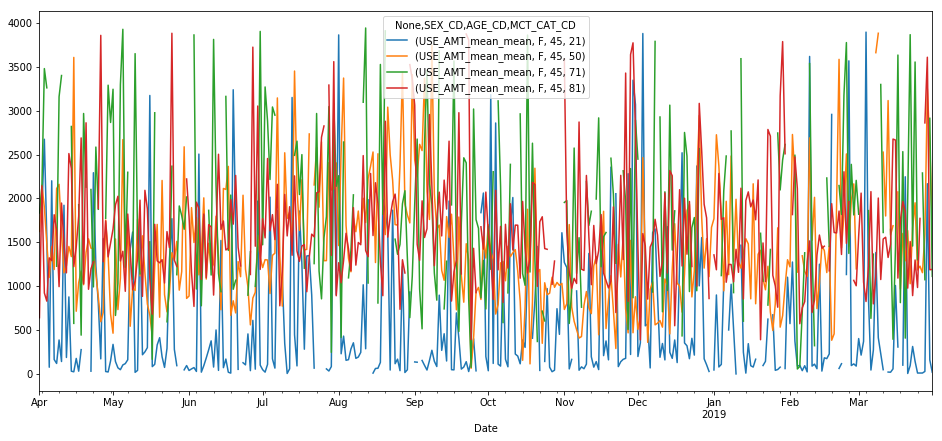

In [93]:
cate_sex_age_time(350, 695, SEX='F', AGE=45)

[40, 70, 71, 33, 81, ..., 32, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 70, 71, 33, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
7   연료판매          33
10   유통업          40
18  의료기관          70
19  보건위생          71
21  음료식품          81


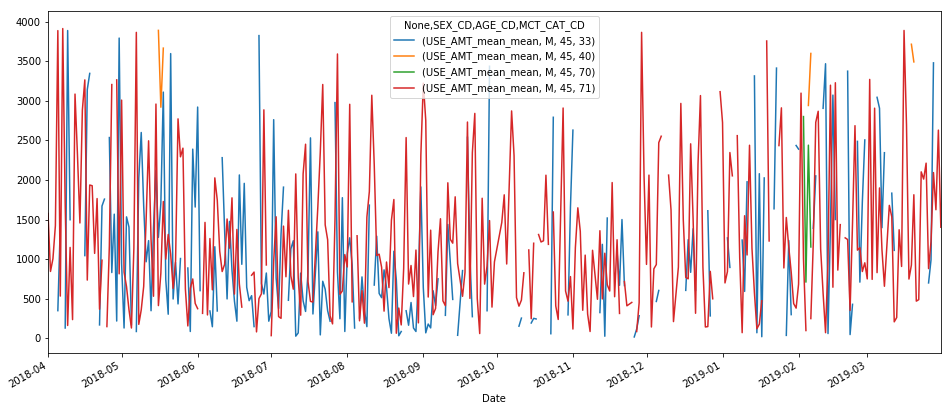

In [94]:
cate_sex_age_time(350, 695, SEX='M', AGE=45)

[40, 80, 33, 20, 71, ..., 10, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 80, 33, 20, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
1   레저용품          20
7   연료판매          33
10   유통업          40
19  보건위생          71
20  요식업소          80


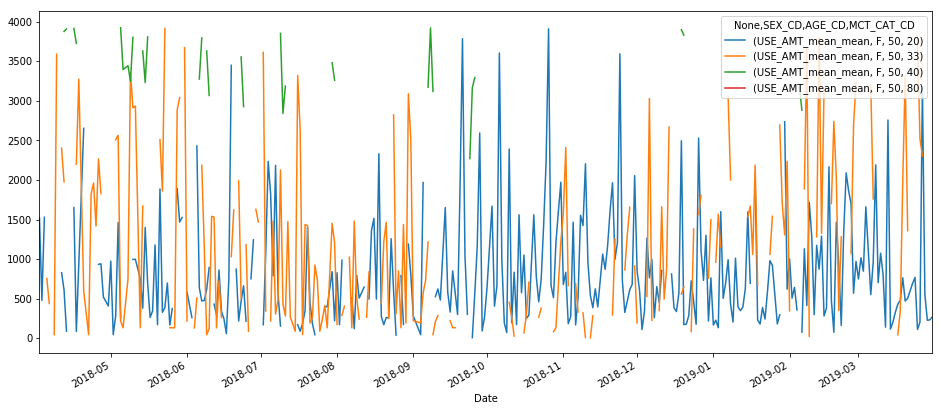

In [95]:
cate_sex_age_time(350, 695, SEX='F', AGE=50)

[40, 71, 21, 33, 70, ..., 43, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 71, 21, 33, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
2   레저업소          21
7   연료판매          33
10   유통업          40
18  의료기관          70
19  보건위생          71


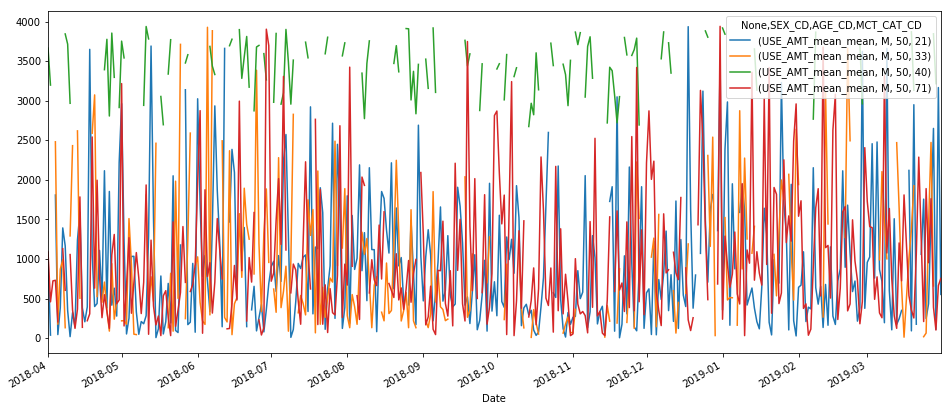

In [96]:
cate_sex_age_time(350, 695, SEX='M', AGE=50)

[40, 70, 80, 71, 33, ..., 30, 31, 35, 43, 60]
Length: 23
Categories (23, int64): [40, 70, 80, 71, ..., 31, 35, 43, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
7   연료판매          33
10   유통업          40
18  의료기관          70
19  보건위생          71
20  요식업소          80


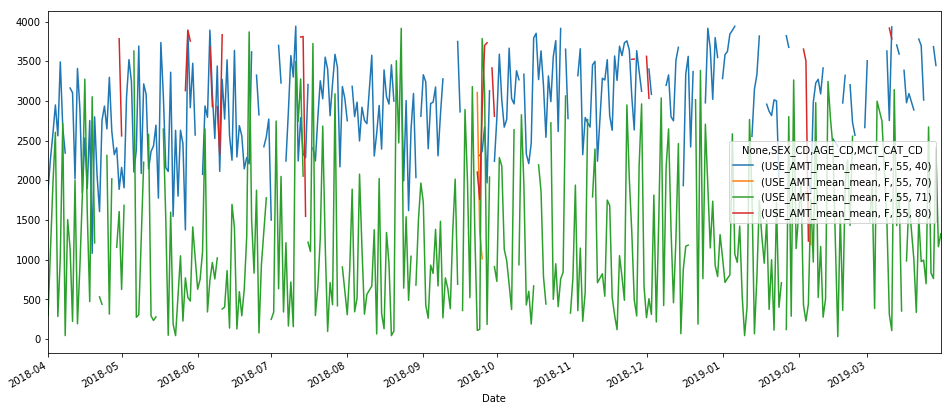

In [97]:
cate_sex_age_time(350, 695, SEX='F', AGE=55)

[40, 71, 81, 33, 70, ..., 43, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [40, 71, 81, 33, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
7   연료판매          33
10   유통업          40
18  의료기관          70
19  보건위생          71
21  음료식품          81


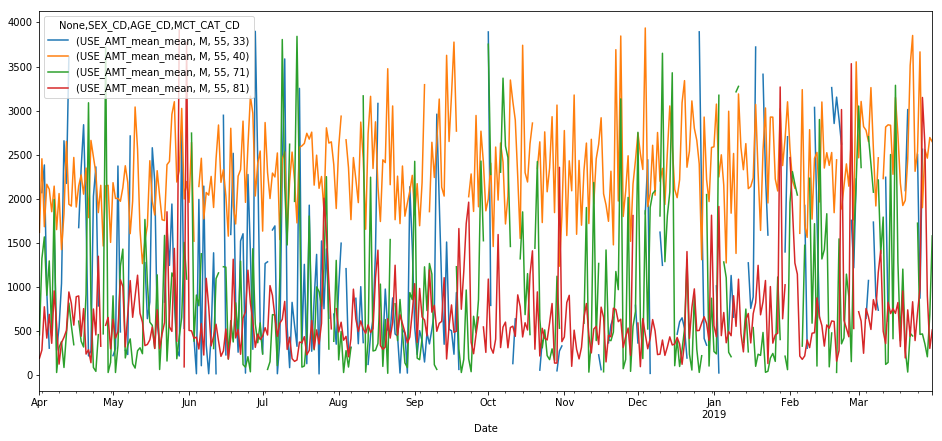

In [98]:
cate_sex_age_time(350, 695, SEX='M', AGE=55)

[80, 40, 20, 33, 81, ..., 52, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [80, 40, 20, 33, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.125;0.775x0.755)
    NAME  MCT_CAT_CD
1   레저용품          20
7   연료판매          33
10   유통업          40
20  요식업소          80
21  음료식품          81


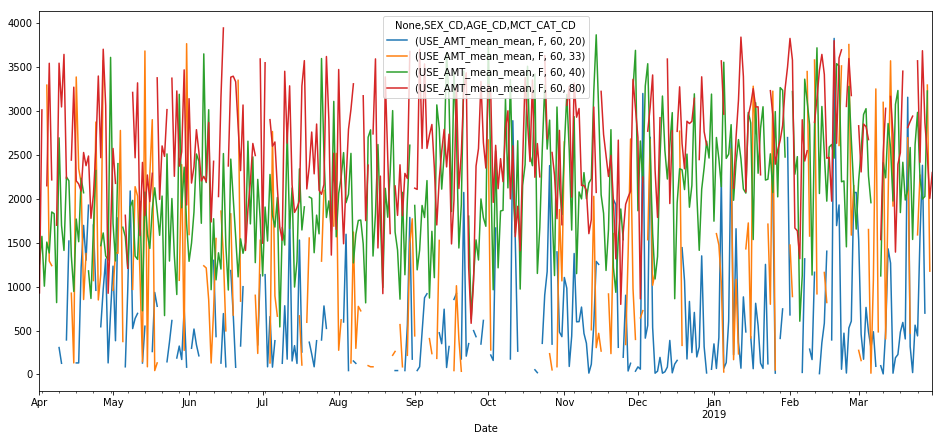

In [99]:
cate_sex_age_time(350, 695, SEX='F', AGE=60)

[80, 20, 21, 70, 33, ..., 52, 30, 31, 35, 60]
Length: 23
Categories (23, int64): [80, 20, 21, 70, ..., 30, 31, 35, 60]
AxesSubplot(0.125,0.2;0.775x0.68)
    NAME  MCT_CAT_CD
1   레저용품          20
2   레저업소          21
7   연료판매          33
18  의료기관          70
20  요식업소          80


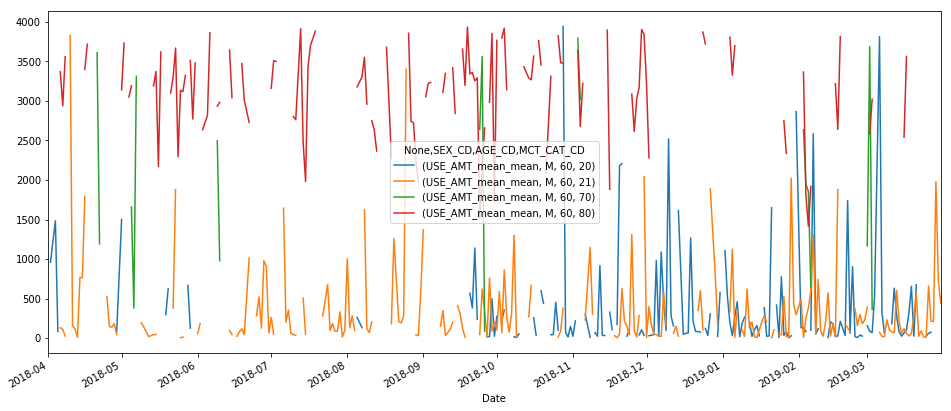

In [100]:
cate_sex_age_time(350, 695, SEX='M', AGE=60)

### 성별, 연령별 시계열 시각화

In [101]:
group = card.groupby(['STD_DD','GU_CD','SEX_CD','MCT_CAT_CD','AGE_CD']).agg({'USE_CNT':['mean'],'USE_AMT':['mean']})
group.columns = ["_".join(x) for x in group.columns.ravel()]

a = group.reset_index().sort_values(by=['STD_DD','GU_CD','SEX_CD','AGE_CD'], ascending = True)

In [102]:
a

STD_DD GU_CD SEX_CD MCT_CAT_CD AGE_CD  USE_CNT_mean  USE_AMT_mean
0      2018-04-01   110      F         10     20     14.800000    599.600000
10     2018-04-01   110      F         20     20     23.333333    581.000000
20     2018-04-01   110      F         21     20     67.166667    486.833333
30     2018-04-01   110      F         22     20     85.714286    787.571429
43     2018-04-01   110      F         33     20      4.000000    274.000000
53     2018-04-01   110      F         34     20      6.250000    387.750000
59     2018-04-01   110      F         35     20      9.000000    700.000000
64     2018-04-01   110      F         40     20    153.642857    948.571429
74     2018-04-01   110      F         42     20     30.583333    901.250000
84     2018-04-01   110      F         43     20      9.000000    131.000000
92     2018-04-01   110      F         44     20     39.375000   1048.000000
102    2018-04-01   110      F         50     20     65.600000    611.400000
112    2018-04-01   110      F         52     20     13.000000     59.000000
115    2018-04-01   110      F         62     20     13.000000     84.500000
125    2018-04-01   110      F         70     20     21.857143    599.000000
135    2018-04-01   110      F         71     20     26.500000    619.500000
145    2018-04-01   110      F         80     20     85.666667   1084.444444
155    2018-04-01   110      F         81     20     45.000000    358.176471
165    2018-04-01   110      F         92     20      6.500000    289.000000
1      2018-04-01   110      F         10     25      4.000000     88.000000
11     2018-04-01   110      F         20     25     18.500000    622.750000
21     2018-04-01   110      F         21     25     54.666667    966.666667
31     2018-04-01   110      F         22     25     54.555556    607.444444
44     2018-04-01   110      F         33     25      4.000000    225.500000
54     2018-04-01   110      F         34     25      7.500000     91.000000
65     2018-04-01   110      F         40     25    120.692308    882.923077
75     2018-04-01   110      F         42     25     20.600000    850.600000
93     2018-04-01   110      F         44     25     28.375000    725.000000
103    2018-04-01   110      F         50     25     40.000000    424.833333
116    2018-04-01   110      F         62     25     35.833333    173.166667
...           ...   ...    ...        ...    ...           ...           ...
272002 2019-03-31   350      M         20     60      7.000000     80.500000
272012 2019-03-31   350      M         21     60     11.625000    577.625000
272022 2019-03-31   350      M         22     60      9.500000     76.000000
272038 2019-03-31   350      M         33     60     12.333333    555.333333
272051 2019-03-31   350      M         35     60      5.000000    449.000000
272061 2019-03-31   350      M         40     60    119.461538   1592.692308
272071 2019-03-31   350      M         42     60      9.500000    418.500000
272092 2019-03-31   350      M         50     60      8.000000    255.250000
272105 2019-03-31   350      M         62     60      7.600000    173.800000
272115 2019-03-31   350      M         70     60     12.500000    213.900000
272125 2019-03-31   350      M         71     60     17.357143    215.142857
272135 2019-03-31   350      M         80     60     56.071429   1422.357143
272145 2019-03-31   350      M         81     60     22.687500    324.750000
272155 2019-03-31   350      M         92     60      5.000000    104.000000
271993 2019-03-31   350      M         10     65      5.000000    304.000000
272003 2019-03-31   350      M         20     65      9.250000   1697.000000
272013 2019-03-31   350      M         21     65     10.375000    405.875000
272023 2019-03-31   350      M         22     65      9.500000     73.000000
272039 2019-03-31   350      M         33     65      6.333333    210.333333
272052 2019-03-31   350      M         35     65      9.500000   1895.500000
272062 

In [103]:
def gu_sex_age(GU, SEX='F', AGE=40, i=[70,80,40]): #i=[70,80,40]):

    b=a.loc[(a.GU_CD == GU)]
    b= b[['STD_DD','SEX_CD','AGE_CD','MCT_CAT_CD','USE_CNT_mean' ,'USE_AMT_mean']].dropna()
    b['STD_DD']=pd.to_datetime(b['STD_DD'])
    b = b.groupby(['STD_DD','SEX_CD','AGE_CD','MCT_CAT_CD']).agg({'AGE_CD':['count'],'USE_CNT_mean':['mean'],
                                                                            'USE_AMT_mean':['mean']})
    b.columns = ["_".join(x) for x in b.columns.ravel()]
    b.reset_index(inplace=True)
    b.rename(columns={'STD_DD':'Date'}, inplace=True)
#     b = b.set_index('Date')
#     b.index = b.index.astype(str)

    d = b[(b['SEX_CD']== SEX)]
    e = d[(d['AGE_CD']== AGE)]  

    e = e.groupby(['Date','SEX_CD','AGE_CD','MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
    e.reset_index(inplace=True)
    e = e[['Date','SEX_CD','AGE_CD','MCT_CAT_CD','USE_AMT_mean_mean']]
#     h=e.groupby(['SEX_CD','MCT_CAT_CD'])[['USE_AMT_mean_mean']].mean()
#     num1 = h[:5]
#     h.reset_index(inplace=True)
#     h[hi] = len(h[(h['USE_AMT_mean_mean'] > 10)])/len(e.Date)
#     print(e[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).head())
#     print(h[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean','hi']].sort_values(by=['USE_AMT_mean_mean','hi'], ascending = False).head())
    print(e[['Date','SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique())
    num = e[['SEX_CD','MCT_CAT_CD','USE_AMT_mean_mean']].sort_values(by=['USE_AMT_mean_mean'], ascending = False).MCT_CAT_CD.unique()
    num = num[:5]
    
    e = e[e.MCT_CAT_CD.isin(i)].pivot_table(index=['Date'], columns=['SEX_CD','AGE_CD','MCT_CAT_CD'], aggfunc= lambda x: x)
    print(e)
    print(e.plot(figsize=(16,7))) #9
 
    cate['MCT_CAT_CD']=cate['MCT_CAT_CD'].astype('int')
    print(cate[cate.MCT_CAT_CD.isin(i)])

[30, 35, 34, 52, 31, ..., 42, 21, 92, 20, 22]
Length: 23
Categories (23, int64): [30, 35, 34, 52, ..., 21, 92, 20, 22]
           USE_AMT_mean_mean
SEX_CD                     F
AGE_CD                    40
MCT_CAT_CD                70
Date                        
2018-04-01        490.384615
2018-04-02       1339.266667
2018-04-03       1511.538462
2018-04-04       1024.357143
2018-04-05       1143.400000
2018-04-06       1237.923077
2018-04-07       1073.000000
2018-04-08        826.615385
2018-04-09       1528.230769
2018-04-10       1343.533333
2018-04-11       1470.916667
2018-04-12       1432.928571
2018-04-13       1344.214286
2018-04-14       1295.800000
2018-04-15        842.066667
2018-04-16       1210.846154
2018-04-17        933.583333
2018-04-18       1504.266667
2018-04-19       1100.692308
2018-04-20       1157.800000
2018-04-21        866.615385
2018-04-22        504.000000
2018-04-23       1399.200000
2018-04-24        884.545455
2018-04-25        879.533333
2018-04-26 

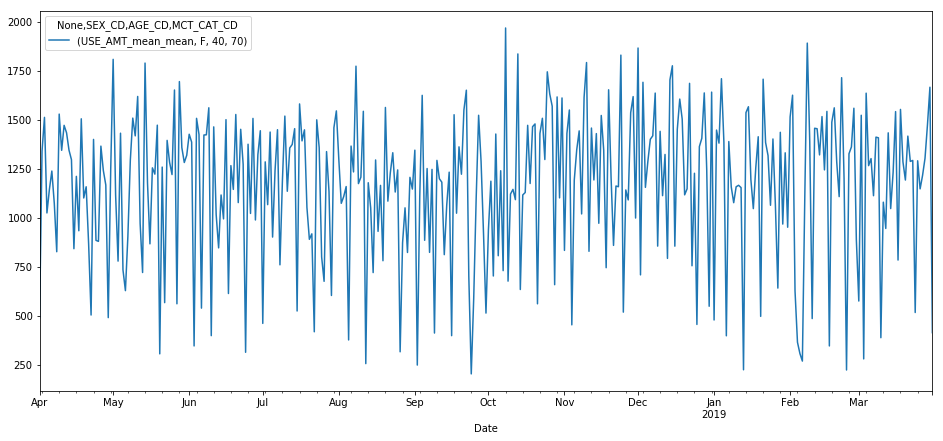

In [104]:
gu_sex_age(350,'F',40,[70])

# 환경 - 카드 상관분석

### 세분화된 카드-환경 상관분석 

In [105]:
card_e=pd.read_csv('가공데이터/merge_카드_유동_환경_edit2.csv')

card_e = card_e.iloc[:,1:]
card_e['date'] = pd.to_datetime(card_e['date'],format = '%Y-%m-%d')

In [106]:
card_e=card_e[['date', 'year', 'quarter', 'month', 'weekday', 'day', 'district',
              'p10_median_day', 'p25_median_day','10M_20A_F_USE_AMT', '20M_20A_F_USE_AMT', '21M_20A_F_USE_AMT',
       '22M_20A_F_USE_AMT', '30M_20A_F_USE_AMT', '31M_20A_F_USE_AMT',
       '32M_20A_F_USE_AMT', '33M_20A_F_USE_AMT', '34M_20A_F_USE_AMT',
       '35M_20A_F_USE_AMT', '40M_20A_F_USE_AMT', '42M_20A_F_USE_AMT',
       '43M_20A_F_USE_AMT', '44M_20A_F_USE_AMT', '50M_20A_F_USE_AMT',
       '52M_20A_F_USE_AMT', '60M_20A_F_USE_AMT', '62M_20A_F_USE_AMT',
       '70M_20A_F_USE_AMT', '71M_20A_F_USE_AMT', '80M_20A_F_USE_AMT',
       '81M_20A_F_USE_AMT', '92M_20A_F_USE_AMT', '10M_25A_F_USE_AMT',
       '20M_25A_F_USE_AMT', '21M_25A_F_USE_AMT', '22M_25A_F_USE_AMT',
       '30M_25A_F_USE_AMT', '31M_25A_F_USE_AMT', '32M_25A_F_USE_AMT',
       '33M_25A_F_USE_AMT', '34M_25A_F_USE_AMT', '35M_25A_F_USE_AMT',
       '40M_25A_F_USE_AMT', '42M_25A_F_USE_AMT', '43M_25A_F_USE_AMT',
       '44M_25A_F_USE_AMT', '50M_25A_F_USE_AMT', '52M_25A_F_USE_AMT',
       '60M_25A_F_USE_AMT', '62M_25A_F_USE_AMT', '70M_25A_F_USE_AMT',
       '71M_25A_F_USE_AMT', '80M_25A_F_USE_AMT', '81M_25A_F_USE_AMT',
       '92M_25A_F_USE_AMT', '10M_30A_F_USE_AMT', '20M_30A_F_USE_AMT',
       '21M_30A_F_USE_AMT', '22M_30A_F_USE_AMT', '30M_30A_F_USE_AMT',
       '31M_30A_F_USE_AMT', '32M_30A_F_USE_AMT', '33M_30A_F_USE_AMT',
       '34M_30A_F_USE_AMT', '35M_30A_F_USE_AMT', '40M_30A_F_USE_AMT',
       '42M_30A_F_USE_AMT', '43M_30A_F_USE_AMT', '44M_30A_F_USE_AMT',
       '50M_30A_F_USE_AMT', '52M_30A_F_USE_AMT', '60M_30A_F_USE_AMT',
       '62M_30A_F_USE_AMT', '70M_30A_F_USE_AMT', '71M_30A_F_USE_AMT',
       '80M_30A_F_USE_AMT', '81M_30A_F_USE_AMT', '92M_30A_F_USE_AMT',
       '10M_35A_F_USE_AMT', '20M_35A_F_USE_AMT', '21M_35A_F_USE_AMT',
       '22M_35A_F_USE_AMT', '30M_35A_F_USE_AMT', '31M_35A_F_USE_AMT',
       '32M_35A_F_USE_AMT', '33M_35A_F_USE_AMT', '34M_35A_F_USE_AMT',
       '35M_35A_F_USE_AMT', '40M_35A_F_USE_AMT', '42M_35A_F_USE_AMT',
       '43M_35A_F_USE_AMT', '44M_35A_F_USE_AMT', '50M_35A_F_USE_AMT',
       '52M_35A_F_USE_AMT', '60M_35A_F_USE_AMT', '62M_35A_F_USE_AMT',
       '70M_35A_F_USE_AMT', '71M_35A_F_USE_AMT', '80M_35A_F_USE_AMT',
       '81M_35A_F_USE_AMT', '92M_35A_F_USE_AMT', '10M_40A_F_USE_AMT',
       '20M_40A_F_USE_AMT', '21M_40A_F_USE_AMT', '22M_40A_F_USE_AMT',
       '30M_40A_F_USE_AMT', '31M_40A_F_USE_AMT', '32M_40A_F_USE_AMT',
       '33M_40A_F_USE_AMT', '34M_40A_F_USE_AMT', '35M_40A_F_USE_AMT',
       '40M_40A_F_USE_AMT', '42M_40A_F_USE_AMT', '43M_40A_F_USE_AMT',
       '44M_40A_F_USE_AMT', '50M_40A_F_USE_AMT', '52M_40A_F_USE_AMT',
       '60M_40A_F_USE_AMT', '62M_40A_F_USE_AMT', '70M_40A_F_USE_AMT',
       '71M_40A_F_USE_AMT', '80M_40A_F_USE_AMT', '81M_40A_F_USE_AMT',
       '92M_40A_F_USE_AMT', '10M_45A_F_USE_AMT', '20M_45A_F_USE_AMT',
       '21M_45A_F_USE_AMT', '22M_45A_F_USE_AMT', '30M_45A_F_USE_AMT',
       '31M_45A_F_USE_AMT', '32M_45A_F_USE_AMT', '33M_45A_F_USE_AMT',
       '34M_45A_F_USE_AMT', '35M_45A_F_USE_AMT', '40M_45A_F_USE_AMT',
       '42M_45A_F_USE_AMT', '43M_45A_F_USE_AMT', '44M_45A_F_USE_AMT',
       '50M_45A_F_USE_AMT', '52M_45A_F_USE_AMT', '60M_45A_F_USE_AMT',
       '62M_45A_F_USE_AMT', '70M_45A_F_USE_AMT', '71M_45A_F_USE_AMT',
       '80M_45A_F_USE_AMT', '81M_45A_F_USE_AMT', '92M_45A_F_USE_AMT',
       '10M_50A_F_USE_AMT', '20M_50A_F_USE_AMT', '21M_50A_F_USE_AMT',
       '22M_50A_F_USE_AMT', '30M_50A_F_USE_AMT', '31M_50A_F_USE_AMT',
       '32M_50A_F_USE_AMT', '33M_50A_F_USE_AMT', '34M_50A_F_USE_AMT',
       '35M_50A_F_USE_AMT', '40M_50A_F_USE_AMT', '42M_50A_F_USE_AMT',
       '43M_50A_F_USE_AMT', '44M_50A_F_USE_AMT', '50M_50A_F_USE_AMT',
       '52M_50A_F_USE_AMT', '60M_50A_F_USE_AMT', '62M_50A_F_USE_AMT',
       '70M_50A_F_USE_AMT', '71M_50A_F_USE_AMT', '80M_50A_F_USE_AMT',
       '81M_50A_F_USE_AMT', '92M_50A_F_USE_AMT', '10M_55A_F_USE_AMT',
       '20M_55A_F_USE_AMT', '21M_55A_F_USE_AMT', '22M_55A_F_USE_AMT',
       '30M_55A_F_USE_AMT', '31M_55A_F_USE_AMT', '32M_55A_F_USE_AMT',
       '33M_55A_F_USE_AMT', '34M_55A_F_USE_AMT', '35M_55A_F_USE_AMT',
       '40M_55A_F_USE_AMT', '42M_55A_F_USE_AMT', '43M_55A_F_USE_AMT',
       '44M_55A_F_USE_AMT', '50M_55A_F_USE_AMT', '52M_55A_F_USE_AMT',
       '60M_55A_F_USE_AMT', '62M_55A_F_USE_AMT', '70M_55A_F_USE_AMT',
       '71M_55A_F_USE_AMT', '80M_55A_F_USE_AMT', '81M_55A_F_USE_AMT',
       '92M_55A_F_USE_AMT', '10M_60A_F_USE_AMT', '20M_60A_F_USE_AMT',
       '21M_60A_F_USE_AMT', '22M_60A_F_USE_AMT', '30M_60A_F_USE_AMT',
       '31M_60A_F_USE_AMT', '32M_60A_F_USE_AMT', '33M_60A_F_USE_AMT',
       '34M_60A_F_USE_AMT', '35M_60A_F_USE_AMT', '40M_60A_F_USE_AMT',
       '42M_60A_F_USE_AMT', '43M_60A_F_USE_AMT', '44M_60A_F_USE_AMT',
       '50M_60A_F_USE_AMT', '52M_60A_F_USE_AMT', '60M_60A_F_USE_AMT',
       '62M_60A_F_USE_AMT', '70M_60A_F_USE_AMT', '71M_60A_F_USE_AMT',
       '80M_60A_F_USE_AMT', '81M_60A_F_USE_AMT', '92M_60A_F_USE_AMT',
       '10M_65A_F_USE_AMT', '20M_65A_F_USE_AMT', '21M_65A_F_USE_AMT',
       '22M_65A_F_USE_AMT', '30M_65A_F_USE_AMT', '31M_65A_F_USE_AMT',
       '32M_65A_F_USE_AMT', '33M_65A_F_USE_AMT', '34M_65A_F_USE_AMT',
       '35M_65A_F_USE_AMT', '40M_65A_F_USE_AMT', '42M_65A_F_USE_AMT',
       '43M_65A_F_USE_AMT', '44M_65A_F_USE_AMT', '50M_65A_F_USE_AMT',
       '52M_65A_F_USE_AMT', '60M_65A_F_USE_AMT', '62M_65A_F_USE_AMT',
       '70M_65A_F_USE_AMT', '71M_65A_F_USE_AMT', '80M_65A_F_USE_AMT',
       '81M_65A_F_USE_AMT', '92M_65A_F_USE_AMT', '10M_20A_M_USE_AMT',
       '20M_20A_M_USE_AMT', '21M_20A_M_USE_AMT', '22M_20A_M_USE_AMT',
       '30M_20A_M_USE_AMT', '31M_20A_M_USE_AMT', '32M_20A_M_USE_AMT',
       '33M_20A_M_USE_AMT', '34M_20A_M_USE_AMT', '35M_20A_M_USE_AMT',
       '40M_20A_M_USE_AMT', '42M_20A_M_USE_AMT', '43M_20A_M_USE_AMT',
       '44M_20A_M_USE_AMT', '50M_20A_M_USE_AMT', '52M_20A_M_USE_AMT',
       '60M_20A_M_USE_AMT', '62M_20A_M_USE_AMT', '70M_20A_M_USE_AMT',
       '71M_20A_M_USE_AMT', '80M_20A_M_USE_AMT', '81M_20A_M_USE_AMT',
       '92M_20A_M_USE_AMT', '10M_25A_M_USE_AMT', '20M_25A_M_USE_AMT',
       '21M_25A_M_USE_AMT', '22M_25A_M_USE_AMT', '30M_25A_M_USE_AMT',
       '31M_25A_M_USE_AMT', '32M_25A_M_USE_AMT', '33M_25A_M_USE_AMT',
       '34M_25A_M_USE_AMT', '35M_25A_M_USE_AMT', '40M_25A_M_USE_AMT',
       '42M_25A_M_USE_AMT', '43M_25A_M_USE_AMT', '44M_25A_M_USE_AMT',
       '50M_25A_M_USE_AMT', '52M_25A_M_USE_AMT', '60M_25A_M_USE_AMT',
       '62M_25A_M_USE_AMT', '70M_25A_M_USE_AMT', '71M_25A_M_USE_AMT',
       '80M_25A_M_USE_AMT', '81M_25A_M_USE_AMT', '92M_25A_M_USE_AMT',
       '10M_30A_M_USE_AMT', '20M_30A_M_USE_AMT', '21M_30A_M_USE_AMT',
       '22M_30A_M_USE_AMT', '30M_30A_M_USE_AMT', '31M_30A_M_USE_AMT',
       '32M_30A_M_USE_AMT', '33M_30A_M_USE_AMT', '34M_30A_M_USE_AMT',
       '35M_30A_M_USE_AMT', '40M_30A_M_USE_AMT', '42M_30A_M_USE_AMT',
       '43M_30A_M_USE_AMT', '44M_30A_M_USE_AMT', '50M_30A_M_USE_AMT',
       '52M_30A_M_USE_AMT', '60M_30A_M_USE_AMT', '62M_30A_M_USE_AMT',
       '70M_30A_M_USE_AMT', '71M_30A_M_USE_AMT', '80M_30A_M_USE_AMT',
       '81M_30A_M_USE_AMT', '92M_30A_M_USE_AMT', '10M_35A_M_USE_AMT',
       '20M_35A_M_USE_AMT', '21M_35A_M_USE_AMT', '22M_35A_M_USE_AMT',
       '30M_35A_M_USE_AMT', '31M_35A_M_USE_AMT', '32M_35A_M_USE_AMT',
       '33M_35A_M_USE_AMT', '34M_35A_M_USE_AMT', '35M_35A_M_USE_AMT',
       '40M_35A_M_USE_AMT', '42M_35A_M_USE_AMT', '43M_35A_M_USE_AMT',
       '44M_35A_M_USE_AMT', '50M_35A_M_USE_AMT', '52M_35A_M_USE_AMT',
       '60M_35A_M_USE_AMT', '62M_35A_M_USE_AMT', '70M_35A_M_USE_AMT',
       '71M_35A_M_USE_AMT', '80M_35A_M_USE_AMT', '81M_35A_M_USE_AMT',
       '92M_35A_M_USE_AMT', '10M_40A_M_USE_AMT', '20M_40A_M_USE_AMT',
       '21M_40A_M_USE_AMT', '22M_40A_M_USE_AMT', '30M_40A_M_USE_AMT',
       '31M_40A_M_USE_AMT', '32M_40A_M_USE_AMT', '33M_40A_M_USE_AMT',
       '34M_40A_M_USE_AMT', '35M_40A_M_USE_AMT', '40M_40A_M_USE_AMT',
       '42M_40A_M_USE_AMT', '43M_40A_M_USE_AMT', '44M_40A_M_USE_AMT',
       '50M_40A_M_USE_AMT', '52M_40A_M_USE_AMT', '60M_40A_M_USE_AMT',
       '62M_40A_M_USE_AMT', '70M_40A_M_USE_AMT', '71M_40A_M_USE_AMT',
       '80M_40A_M_USE_AMT', '81M_40A_M_USE_AMT', '92M_40A_M_USE_AMT',
       '10M_45A_M_USE_AMT', '20M_45A_M_USE_AMT', '21M_45A_M_USE_AMT',
       '22M_45A_M_USE_AMT', '30M_45A_M_USE_AMT', '31M_45A_M_USE_AMT',
       '32M_45A_M_USE_AMT', '33M_45A_M_USE_AMT', '34M_45A_M_USE_AMT',
       '35M_45A_M_USE_AMT', '40M_45A_M_USE_AMT', '42M_45A_M_USE_AMT',
       '43M_45A_M_USE_AMT', '44M_45A_M_USE_AMT', '50M_45A_M_USE_AMT',
       '52M_45A_M_USE_AMT', '60M_45A_M_USE_AMT', '62M_45A_M_USE_AMT',
       '70M_45A_M_USE_AMT', '71M_45A_M_USE_AMT', '80M_45A_M_USE_AMT',
       '81M_45A_M_USE_AMT', '92M_45A_M_USE_AMT', '10M_50A_M_USE_AMT',
       '20M_50A_M_USE_AMT', '21M_50A_M_USE_AMT', '22M_50A_M_USE_AMT',
       '30M_50A_M_USE_AMT', '31M_50A_M_USE_AMT', '32M_50A_M_USE_AMT',
       '33M_50A_M_USE_AMT', '34M_50A_M_USE_AMT', '35M_50A_M_USE_AMT',
       '40M_50A_M_USE_AMT', '42M_50A_M_USE_AMT', '43M_50A_M_USE_AMT',
       '44M_50A_M_USE_AMT', '50M_50A_M_USE_AMT', '52M_50A_M_USE_AMT',
       '60M_50A_M_USE_AMT', '62M_50A_M_USE_AMT', '70M_50A_M_USE_AMT',
       '71M_50A_M_USE_AMT', '80M_50A_M_USE_AMT', '81M_50A_M_USE_AMT',
       '92M_50A_M_USE_AMT', '10M_55A_M_USE_AMT', '20M_55A_M_USE_AMT',
       '21M_55A_M_USE_AMT', '22M_55A_M_USE_AMT', '30M_55A_M_USE_AMT',
       '31M_55A_M_USE_AMT', '32M_55A_M_USE_AMT', '33M_55A_M_USE_AMT',
       '34M_55A_M_USE_AMT', '35M_55A_M_USE_AMT', '40M_55A_M_USE_AMT',
       '42M_55A_M_USE_AMT', '43M_55A_M_USE_AMT', '44M_55A_M_USE_AMT',
       '50M_55A_M_USE_AMT', '52M_55A_M_USE_AMT', '60M_55A_M_USE_AMT',
       '62M_55A_M_USE_AMT', '70M_55A_M_USE_AMT', '71M_55A_M_USE_AMT',
       '80M_55A_M_USE_AMT', '81M_55A_M_USE_AMT', '92M_55A_M_USE_AMT',
       '10M_60A_M_USE_AMT', '20M_60A_M_USE_AMT', '21M_60A_M_USE_AMT',
       '22M_60A_M_USE_AMT', '30M_60A_M_USE_AMT', '31M_60A_M_USE_AMT',
       '32M_60A_M_USE_AMT', '33M_60A_M_USE_AMT', '34M_60A_M_USE_AMT',
       '35M_60A_M_USE_AMT', '40M_60A_M_USE_AMT', '42M_60A_M_USE_AMT',
       '43M_60A_M_USE_AMT', '44M_60A_M_USE_AMT', '50M_60A_M_USE_AMT',
       '52M_60A_M_USE_AMT', '60M_60A_M_USE_AMT', '62M_60A_M_USE_AMT',
       '70M_60A_M_USE_AMT', '71M_60A_M_USE_AMT', '80M_60A_M_USE_AMT',
       '81M_60A_M_USE_AMT', '92M_60A_M_USE_AMT', '10M_65A_M_USE_AMT',
       '20M_65A_M_USE_AMT', '21M_65A_M_USE_AMT', '22M_65A_M_USE_AMT',
       '30M_65A_M_USE_AMT', '31M_65A_M_USE_AMT', '32M_65A_M_USE_AMT',
       '33M_65A_M_USE_AMT', '34M_65A_M_USE_AMT', '35M_65A_M_USE_AMT',
       '40M_65A_M_USE_AMT', '42M_65A_M_USE_AMT', '43M_65A_M_USE_AMT',
       '44M_65A_M_USE_AMT', '50M_65A_M_USE_AMT', '52M_65A_M_USE_AMT',
       '60M_65A_M_USE_AMT', '62M_65A_M_USE_AMT', '70M_65A_M_USE_AMT',
       '71M_65A_M_USE_AMT', '80M_65A_M_USE_AMT', '81M_65A_M_USE_AMT',
       '92M_65A_M_USE_AMT', '10M_20A_F_USE_CNT', '20M_20A_F_USE_CNT',
       '21M_20A_F_USE_CNT', '22M_20A_F_USE_CNT', '30M_20A_F_USE_CNT',
       '31M_20A_F_USE_CNT', '32M_20A_F_USE_CNT', '33M_20A_F_USE_CNT',
       '34M_20A_F_USE_CNT', '35M_20A_F_USE_CNT', '40M_20A_F_USE_CNT',
       '42M_20A_F_USE_CNT', '43M_20A_F_USE_CNT', '44M_20A_F_USE_CNT',
       '50M_20A_F_USE_CNT', '52M_20A_F_USE_CNT', '60M_20A_F_USE_CNT',
       '62M_20A_F_USE_CNT', '70M_20A_F_USE_CNT', '71M_20A_F_USE_CNT',
       '80M_20A_F_USE_CNT', '81M_20A_F_USE_CNT', '92M_20A_F_USE_CNT',
       '10M_25A_F_USE_CNT', '20M_25A_F_USE_CNT', '21M_25A_F_USE_CNT',
       '22M_25A_F_USE_CNT', '30M_25A_F_USE_CNT', '31M_25A_F_USE_CNT',
       '32M_25A_F_USE_CNT', '33M_25A_F_USE_CNT', '34M_25A_F_USE_CNT',
       '35M_25A_F_USE_CNT', '40M_25A_F_USE_CNT', '42M_25A_F_USE_CNT',
       '43M_25A_F_USE_CNT', '44M_25A_F_USE_CNT', '50M_25A_F_USE_CNT',
       '52M_25A_F_USE_CNT', '60M_25A_F_USE_CNT', '62M_25A_F_USE_CNT',
       '70M_25A_F_USE_CNT', '71M_25A_F_USE_CNT', '80M_25A_F_USE_CNT',
       '81M_25A_F_USE_CNT', '92M_25A_F_USE_CNT', '10M_30A_F_USE_CNT',
       '20M_30A_F_USE_CNT', '21M_30A_F_USE_CNT', '22M_30A_F_USE_CNT',
       '30M_30A_F_USE_CNT', '31M_30A_F_USE_CNT', '32M_30A_F_USE_CNT',
       '33M_30A_F_USE_CNT', '34M_30A_F_USE_CNT', '35M_30A_F_USE_CNT',
       '40M_30A_F_USE_CNT', '42M_30A_F_USE_CNT', '43M_30A_F_USE_CNT',
       '44M_30A_F_USE_CNT', '50M_30A_F_USE_CNT', '52M_30A_F_USE_CNT',
       '60M_30A_F_USE_CNT', '62M_30A_F_USE_CNT', '70M_30A_F_USE_CNT',
       '71M_30A_F_USE_CNT', '80M_30A_F_USE_CNT', '81M_30A_F_USE_CNT',
       '92M_30A_F_USE_CNT', '10M_35A_F_USE_CNT', '20M_35A_F_USE_CNT',
       '21M_35A_F_USE_CNT', '22M_35A_F_USE_CNT', '30M_35A_F_USE_CNT',
       '31M_35A_F_USE_CNT', '32M_35A_F_USE_CNT', '33M_35A_F_USE_CNT',
       '34M_35A_F_USE_CNT', '35M_35A_F_USE_CNT', '40M_35A_F_USE_CNT',
       '42M_35A_F_USE_CNT', '43M_35A_F_USE_CNT', '44M_35A_F_USE_CNT',
       '50M_35A_F_USE_CNT', '52M_35A_F_USE_CNT', '60M_35A_F_USE_CNT',
       '62M_35A_F_USE_CNT', '70M_35A_F_USE_CNT', '71M_35A_F_USE_CNT',
       '80M_35A_F_USE_CNT', '81M_35A_F_USE_CNT', '92M_35A_F_USE_CNT',
       '10M_40A_F_USE_CNT', '20M_40A_F_USE_CNT', '21M_40A_F_USE_CNT',
       '22M_40A_F_USE_CNT', '30M_40A_F_USE_CNT', '31M_40A_F_USE_CNT',
       '32M_40A_F_USE_CNT', '33M_40A_F_USE_CNT', '34M_40A_F_USE_CNT',
       '35M_40A_F_USE_CNT', '40M_40A_F_USE_CNT', '42M_40A_F_USE_CNT',
       '43M_40A_F_USE_CNT', '44M_40A_F_USE_CNT', '50M_40A_F_USE_CNT',
       '52M_40A_F_USE_CNT', '60M_40A_F_USE_CNT', '62M_40A_F_USE_CNT',
       '70M_40A_F_USE_CNT', '71M_40A_F_USE_CNT', '80M_40A_F_USE_CNT',
       '81M_40A_F_USE_CNT', '92M_40A_F_USE_CNT', '10M_45A_F_USE_CNT',
       '20M_45A_F_USE_CNT', '21M_45A_F_USE_CNT', '22M_45A_F_USE_CNT',
       '30M_45A_F_USE_CNT', '31M_45A_F_USE_CNT', '32M_45A_F_USE_CNT',
       '33M_45A_F_USE_CNT', '34M_45A_F_USE_CNT', '35M_45A_F_USE_CNT',
       '40M_45A_F_USE_CNT', '42M_45A_F_USE_CNT', '43M_45A_F_USE_CNT',
       '44M_45A_F_USE_CNT', '50M_45A_F_USE_CNT', '52M_45A_F_USE_CNT',
       '60M_45A_F_USE_CNT', '62M_45A_F_USE_CNT', '70M_45A_F_USE_CNT',
       '71M_45A_F_USE_CNT', '80M_45A_F_USE_CNT', '81M_45A_F_USE_CNT',
       '92M_45A_F_USE_CNT', '10M_50A_F_USE_CNT', '20M_50A_F_USE_CNT',
       '21M_50A_F_USE_CNT', '22M_50A_F_USE_CNT', '30M_50A_F_USE_CNT',
       '31M_50A_F_USE_CNT', '32M_50A_F_USE_CNT', '33M_50A_F_USE_CNT',
       '34M_50A_F_USE_CNT', '35M_50A_F_USE_CNT', '40M_50A_F_USE_CNT',
       '42M_50A_F_USE_CNT', '43M_50A_F_USE_CNT', '44M_50A_F_USE_CNT',
       '50M_50A_F_USE_CNT', '52M_50A_F_USE_CNT', '60M_50A_F_USE_CNT',
       '62M_50A_F_USE_CNT', '70M_50A_F_USE_CNT', '71M_50A_F_USE_CNT',
       '80M_50A_F_USE_CNT', '81M_50A_F_USE_CNT', '92M_50A_F_USE_CNT',
       '10M_55A_F_USE_CNT', '20M_55A_F_USE_CNT', '21M_55A_F_USE_CNT',
       '22M_55A_F_USE_CNT', '30M_55A_F_USE_CNT', '31M_55A_F_USE_CNT',
       '32M_55A_F_USE_CNT', '33M_55A_F_USE_CNT', '34M_55A_F_USE_CNT',
       '35M_55A_F_USE_CNT', '40M_55A_F_USE_CNT', '42M_55A_F_USE_CNT',
       '43M_55A_F_USE_CNT', '44M_55A_F_USE_CNT', '50M_55A_F_USE_CNT',
       '52M_55A_F_USE_CNT', '60M_55A_F_USE_CNT', '62M_55A_F_USE_CNT',
       '70M_55A_F_USE_CNT', '71M_55A_F_USE_CNT', '80M_55A_F_USE_CNT',
       '81M_55A_F_USE_CNT', '92M_55A_F_USE_CNT', '10M_60A_F_USE_CNT',
       '20M_60A_F_USE_CNT', '21M_60A_F_USE_CNT', '22M_60A_F_USE_CNT',
       '30M_60A_F_USE_CNT', '31M_60A_F_USE_CNT', '32M_60A_F_USE_CNT',
       '33M_60A_F_USE_CNT', '34M_60A_F_USE_CNT', '35M_60A_F_USE_CNT',
       '40M_60A_F_USE_CNT', '42M_60A_F_USE_CNT', '43M_60A_F_USE_CNT',
       '44M_60A_F_USE_CNT', '50M_60A_F_USE_CNT', '52M_60A_F_USE_CNT',
       '60M_60A_F_USE_CNT', '62M_60A_F_USE_CNT', '70M_60A_F_USE_CNT',
       '71M_60A_F_USE_CNT', '80M_60A_F_USE_CNT', '81M_60A_F_USE_CNT',
       '92M_60A_F_USE_CNT', '10M_65A_F_USE_CNT', '20M_65A_F_USE_CNT',
       '21M_65A_F_USE_CNT', '22M_65A_F_USE_CNT', '30M_65A_F_USE_CNT',
       '31M_65A_F_USE_CNT', '32M_65A_F_USE_CNT', '33M_65A_F_USE_CNT',
       '34M_65A_F_USE_CNT', '35M_65A_F_USE_CNT', '40M_65A_F_USE_CNT',
       '42M_65A_F_USE_CNT', '43M_65A_F_USE_CNT', '44M_65A_F_USE_CNT',
       '50M_65A_F_USE_CNT', '52M_65A_F_USE_CNT', '60M_65A_F_USE_CNT',
       '62M_65A_F_USE_CNT', '70M_65A_F_USE_CNT', '71M_65A_F_USE_CNT',
       '80M_65A_F_USE_CNT', '81M_65A_F_USE_CNT', '92M_65A_F_USE_CNT',
       '10M_20A_M_USE_CNT', '20M_20A_M_USE_CNT', '21M_20A_M_USE_CNT',
       '22M_20A_M_USE_CNT', '30M_20A_M_USE_CNT', '31M_20A_M_USE_CNT',
       '32M_20A_M_USE_CNT', '33M_20A_M_USE_CNT', '34M_20A_M_USE_CNT',
       '35M_20A_M_USE_CNT', '40M_20A_M_USE_CNT', '42M_20A_M_USE_CNT',
       '43M_20A_M_USE_CNT', '44M_20A_M_USE_CNT', '50M_20A_M_USE_CNT',
       '52M_20A_M_USE_CNT', '60M_20A_M_USE_CNT', '62M_20A_M_USE_CNT',
       '70M_20A_M_USE_CNT', '71M_20A_M_USE_CNT', '80M_20A_M_USE_CNT',
       '81M_20A_M_USE_CNT', '92M_20A_M_USE_CNT', '10M_25A_M_USE_CNT',
       '20M_25A_M_USE_CNT', '21M_25A_M_USE_CNT', '22M_25A_M_USE_CNT',
       '30M_25A_M_USE_CNT', '31M_25A_M_USE_CNT', '32M_25A_M_USE_CNT',
       '33M_25A_M_USE_CNT', '34M_25A_M_USE_CNT', '35M_25A_M_USE_CNT',
       '40M_25A_M_USE_CNT', '42M_25A_M_USE_CNT', '43M_25A_M_USE_CNT',
       '44M_25A_M_USE_CNT', '50M_25A_M_USE_CNT', '52M_25A_M_USE_CNT',
       '60M_25A_M_USE_CNT', '62M_25A_M_USE_CNT', '70M_25A_M_USE_CNT',
       '71M_25A_M_USE_CNT', '80M_25A_M_USE_CNT', '81M_25A_M_USE_CNT',
       '92M_25A_M_USE_CNT', '10M_30A_M_USE_CNT', '20M_30A_M_USE_CNT',
       '21M_30A_M_USE_CNT', '22M_30A_M_USE_CNT', '30M_30A_M_USE_CNT',
       '31M_30A_M_USE_CNT', '32M_30A_M_USE_CNT', '33M_30A_M_USE_CNT',
       '34M_30A_M_USE_CNT', '35M_30A_M_USE_CNT', '40M_30A_M_USE_CNT',
       '42M_30A_M_USE_CNT', '43M_30A_M_USE_CNT', '44M_30A_M_USE_CNT',
       '50M_30A_M_USE_CNT', '52M_30A_M_USE_CNT', '60M_30A_M_USE_CNT',
       '62M_30A_M_USE_CNT', '70M_30A_M_USE_CNT', '71M_30A_M_USE_CNT',
       '80M_30A_M_USE_CNT', '81M_30A_M_USE_CNT', '92M_30A_M_USE_CNT',
       '10M_35A_M_USE_CNT', '20M_35A_M_USE_CNT', '21M_35A_M_USE_CNT',
       '22M_35A_M_USE_CNT', '30M_35A_M_USE_CNT', '31M_35A_M_USE_CNT',
       '32M_35A_M_USE_CNT', '33M_35A_M_USE_CNT', '34M_35A_M_USE_CNT',
       '35M_35A_M_USE_CNT', '40M_35A_M_USE_CNT', '42M_35A_M_USE_CNT',
       '43M_35A_M_USE_CNT', '44M_35A_M_USE_CNT', '50M_35A_M_USE_CNT',
       '52M_35A_M_USE_CNT', '60M_35A_M_USE_CNT', '62M_35A_M_USE_CNT',
       '70M_35A_M_USE_CNT', '71M_35A_M_USE_CNT', '80M_35A_M_USE_CNT',
       '81M_35A_M_USE_CNT', '92M_35A_M_USE_CNT', '10M_40A_M_USE_CNT',
       '20M_40A_M_USE_CNT', '21M_40A_M_USE_CNT', '22M_40A_M_USE_CNT',
       '30M_40A_M_USE_CNT', '31M_40A_M_USE_CNT', '32M_40A_M_USE_CNT',
       '33M_40A_M_USE_CNT', '34M_40A_M_USE_CNT', '35M_40A_M_USE_CNT',
       '40M_40A_M_USE_CNT', '42M_40A_M_USE_CNT', '43M_40A_M_USE_CNT',
       '44M_40A_M_USE_CNT', '50M_40A_M_USE_CNT', '52M_40A_M_USE_CNT',
       '60M_40A_M_USE_CNT', '62M_40A_M_USE_CNT', '70M_40A_M_USE_CNT',
       '71M_40A_M_USE_CNT', '80M_40A_M_USE_CNT', '81M_40A_M_USE_CNT',
       '92M_40A_M_USE_CNT', '10M_45A_M_USE_CNT', '20M_45A_M_USE_CNT',
       '21M_45A_M_USE_CNT', '22M_45A_M_USE_CNT', '30M_45A_M_USE_CNT',
       '31M_45A_M_USE_CNT', '32M_45A_M_USE_CNT', '33M_45A_M_USE_CNT',
       '34M_45A_M_USE_CNT', '35M_45A_M_USE_CNT', '40M_45A_M_USE_CNT',
       '42M_45A_M_USE_CNT', '43M_45A_M_USE_CNT', '44M_45A_M_USE_CNT',
       '50M_45A_M_USE_CNT', '52M_45A_M_USE_CNT', '60M_45A_M_USE_CNT',
       '62M_45A_M_USE_CNT', '70M_45A_M_USE_CNT', '71M_45A_M_USE_CNT',
       '80M_45A_M_USE_CNT', '81M_45A_M_USE_CNT', '92M_45A_M_USE_CNT',
       '10M_50A_M_USE_CNT', '20M_50A_M_USE_CNT', '21M_50A_M_USE_CNT',
       '22M_50A_M_USE_CNT', '30M_50A_M_USE_CNT', '31M_50A_M_USE_CNT',
       '32M_50A_M_USE_CNT', '33M_50A_M_USE_CNT', '34M_50A_M_USE_CNT',
       '35M_50A_M_USE_CNT', '40M_50A_M_USE_CNT', '42M_50A_M_USE_CNT',
       '43M_50A_M_USE_CNT', '44M_50A_M_USE_CNT', '50M_50A_M_USE_CNT',
       '52M_50A_M_USE_CNT', '60M_50A_M_USE_CNT', '62M_50A_M_USE_CNT',
       '70M_50A_M_USE_CNT', '71M_50A_M_USE_CNT', '80M_50A_M_USE_CNT',
       '81M_50A_M_USE_CNT', '92M_50A_M_USE_CNT', '10M_55A_M_USE_CNT',
       '20M_55A_M_USE_CNT', '21M_55A_M_USE_CNT', '22M_55A_M_USE_CNT',
       '30M_55A_M_USE_CNT', '31M_55A_M_USE_CNT', '32M_55A_M_USE_CNT',
       '33M_55A_M_USE_CNT', '34M_55A_M_USE_CNT', '35M_55A_M_USE_CNT',
       '40M_55A_M_USE_CNT', '42M_55A_M_USE_CNT', '43M_55A_M_USE_CNT',
       '44M_55A_M_USE_CNT', '50M_55A_M_USE_CNT', '52M_55A_M_USE_CNT',
       '60M_55A_M_USE_CNT', '62M_55A_M_USE_CNT', '70M_55A_M_USE_CNT',
       '71M_55A_M_USE_CNT', '80M_55A_M_USE_CNT', '81M_55A_M_USE_CNT',
       '92M_55A_M_USE_CNT', '10M_60A_M_USE_CNT', '20M_60A_M_USE_CNT',
       '21M_60A_M_USE_CNT', '22M_60A_M_USE_CNT', '30M_60A_M_USE_CNT',
       '31M_60A_M_USE_CNT', '32M_60A_M_USE_CNT', '33M_60A_M_USE_CNT',
       '34M_60A_M_USE_CNT', '35M_60A_M_USE_CNT', '40M_60A_M_USE_CNT',
       '42M_60A_M_USE_CNT', '43M_60A_M_USE_CNT', '44M_60A_M_USE_CNT',
       '50M_60A_M_USE_CNT', '52M_60A_M_USE_CNT', '60M_60A_M_USE_CNT',
       '62M_60A_M_USE_CNT', '70M_60A_M_USE_CNT', '71M_60A_M_USE_CNT',
       '80M_60A_M_USE_CNT', '81M_60A_M_USE_CNT', '92M_60A_M_USE_CNT',
       '10M_65A_M_USE_CNT', '20M_65A_M_USE_CNT', '21M_65A_M_USE_CNT',
       '22M_65A_M_USE_CNT', '30M_65A_M_USE_CNT', '31M_65A_M_USE_CNT',
       '32M_65A_M_USE_CNT', '33M_65A_M_USE_CNT', '34M_65A_M_USE_CNT',
       '35M_65A_M_USE_CNT', '40M_65A_M_USE_CNT', '42M_65A_M_USE_CNT',
       '43M_65A_M_USE_CNT', '44M_65A_M_USE_CNT', '50M_65A_M_USE_CNT',
       '52M_65A_M_USE_CNT', '60M_65A_M_USE_CNT', '62M_65A_M_USE_CNT',
       '70M_65A_M_USE_CNT', '71M_65A_M_USE_CNT', '80M_65A_M_USE_CNT',
       '81M_65A_M_USE_CNT', '92M_65A_M_USE_CNT']]

In [107]:
c=card_e.corr().abs()

In [108]:
s = c.unstack()

In [109]:
s= pd.DataFrame(s).reset_index()

In [110]:
s = s[(s.level_0.isin(['p10_median_day','p25_median_day']))]

In [111]:
so = s.sort_values(by=0,kind="quicksort", ascending =False)

### 동별 카드-환경 상관분석

In [112]:
card_e=pd.read_csv('가공데이터/merge_카드_유동_환경_edit1.csv')
card_e = card_e.iloc[:,1:]
card_e['date'] = pd.to_datetime(card_e['date'],format = '%Y-%m-%d')

In [113]:
card_e.columns

Index(['date', 'year', 'quarter', 'month', 'weekday', 'day', 'district', 'gu',
       'p10_most_freq_day', 'p10_mean_day', 'p10_25per', 'p10_median_day',
       'p10_75per', 'p25_most_freq_day', 'p25_mean_day', 'p25_25per',
       'p25_median_day', 'p25_75per', 'humi_mean_day', 'humi_median_day',
       'humi_25per', 'humi_75per', 'temp_mean_day', 'temp_median_day',
       'temp_25per', 'temp_75per', 'noise_mean_day', 'noise_median_day',
       'dis_index_most_freq2', 'SEX_CD', 'AGE_CD', 'trans_pop', 'MCT_CAT_CD',
       'USE_CNT', 'USE_AMT'],
      dtype='object')

In [114]:
card_e=card_e[['date','gu','p10_median_day','p25_median_day','MCT_CAT_CD',
       'USE_CNT', 'USE_AMT'  ]]

#### 이상치 제거 

In [115]:
e=card_e['USE_AMT']

q1, q3= np.percentile(e,[25,75])

iqr = q3 - q1
lower_bound = q1 -(2.5 * iqr) 
upper_bound = q3 +(2.5 * iqr) 

print(lower_bound)
print(upper_bound)

len(e[(e>upper_bound)])/len(e[(e<upper_bound)])

-4317.0
6399.0


0.1104071621640948

In [116]:
card_e = card_e[(card_e['USE_AMT']<upper_bound)]

C:\anaconda3\envs\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning:

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.

C:\anaconda3\envs\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning:

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.

C:\anaconda3\envs\python36\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning:

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.



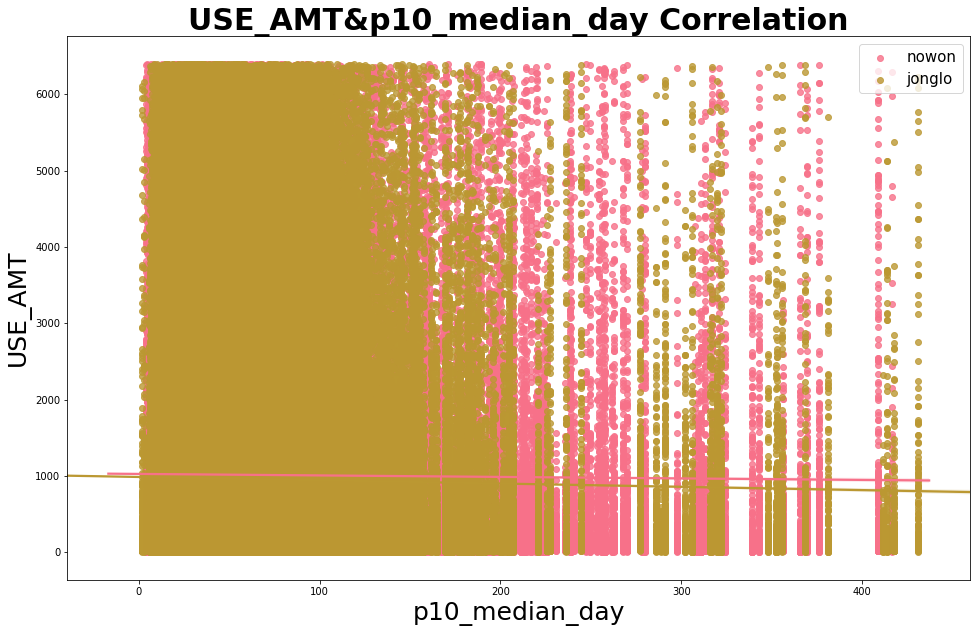

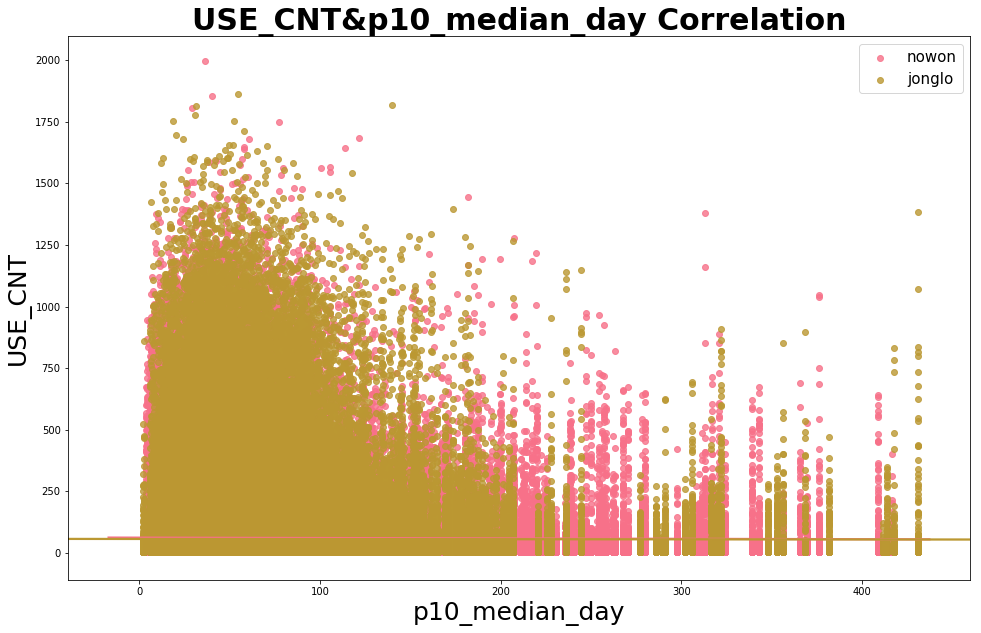

In [117]:
positive_list = {'USE_AMT' : 'USE_AMT', 
                 'USE_CNT' : 'USE_CNT'}

card_e_nowon = card_e[card_e['gu']=='nowon']
card_e_jongno = card_e[card_e['gu']=='jonglo']
sns.set_palette("husl")

for i in positive_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(positive_list[i]+'&p10_median_day Correlation', weight='bold', size=30)
    
    sns.regplot(x=card_e_nowon['p10_median_day'], y=card_e_nowon[i], label='nowon')
    sns.regplot(x=card_e_jongno['p10_median_day'], y=card_e_jongno[i], label='jonglo')
    
    plt.legend(loc='upper right', fontsize=15)
    plt.xlabel('p10_median_day', size=25)
    plt.ylabel(positive_list[i], size=25)
    
    plt.savefig('img/p10_median_day_'+positive_list[i]+'.png')
    
    plt.show()